In [1]:
import datetime
import json
import os
import requests
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import io

# NOTE: Be sure to see the README file 1st 

Once the requests have been made to Google Maps Platform and the data has been compiled, we will use it to make the calls to Yelp Fusion's API.

# GOOGLE MAPS

In [2]:
# Reading in Google Maps CSV (methodology for how that was collected in EDA)
Data_90011_90032 = pd.read_csv('results_90011_90032.csv')
Data_90025 = pd.read_csv('results_90025.csv')
Data_90027 = pd.read_csv('results_90027.csv')
Data_90240 = pd.read_csv('results_90240.csv')

# Exploring what it actually looks like
pd.options.display.max_columns = 100
Data_90011_90032.head(15)

|                           id  \
0   ChIJRVfrG4nIwoARF_SkMwFk7EA  ChIJRVfrG4nIwoARF_SkMwFk7EA   
1   ChIJcTMb_ljJwoARXoRUY6F22Lw  ChIJcTMb_ljJwoARXoRUY6F22Lw   
2   ChIJH-YgEonIwoARlzWDWF2Khjg  ChIJH-YgEonIwoARlzWDWF2Khjg   
3   ChIJ8_3mEInIwoARh-oTmrR7dFw  ChIJ8_3mEInIwoARh-oTmrR7dFw   
4   ChIJAQBAzovIwoAR1GZWEUhuMz8  ChIJAQBAzovIwoAR1GZWEUhuMz8   
5   ChIJbcMD04vIwoARrOXHTKbzYLI  ChIJbcMD04vIwoARrOXHTKbzYLI   
6   ChIJo3ZmfjvJwoARHltRHyx-kRY  ChIJo3ZmfjvJwoARHltRHyx-kRY   
7   ChIJb-BT0ovIwoAR9P4Mkw5C6wo  ChIJb-BT0ovIwoAR9P4Mkw5C6wo   
8   ChIJbcMD04vIwoARaET1lgJbQ30  ChIJbcMD04vIwoARaET1lgJbQ30   
9   ChIJoyR8qIjIwoARtczgMcEuV9Y  ChIJoyR8qIjIwoARtczgMcEuV9Y   
10  ChIJJ2BOrIjIwoARwzVXmxioJyw  ChIJJ2BOrIjIwoARwzVXmxioJyw   
11  ChIJQbVbXR_JwoAR2-mEUggAYYM  ChIJQbVbXR_JwoAR2-mEUggAYYM   
12  ChIJAQCwHYbIwoAR7nbWsiVrSRc  ChIJAQCwHYbIwoAR7nbWsiVrSRc   
13  ChIJq2OHoIjIwoARP7XakSu-avI  ChIJq2OHoIjIwoARP7XakSu-avI   
14  ChIJI3isyojIwoARtD13fC6VKPE  ChIJI3isyojIwoARtD13fC6VKPE   

                                name  rating  ratings  \
0   Emmanuel Church of God in Christ     4.2      5.0   
1                 maiky winwdow tint     NaN      NaN   
2                       Jose Pillows     NaN      NaN   
3           Neighborhood Meat Market     1.2      5.0   
4              Moran's Premium Foods     NaN      NaN   
5                     Don Lee Farms®     3.7     19.0   
6        Samuel R. Browne Auditorium     NaN      NaN   
7                     Naples Kitchen     5.0      1.0   
8                     CLW Foods, Inc     NaN      NaN   
9                     Cochos Textile     NaN      NaN   
10                     Best Trimming     NaN      NaN   
11                 Ces Femme by Miin     5.0      1.0   
12                Fabrica De Costura     NaN      NaN   
13                        Mixografia     4.9      7.0   
14                 Elite Sublimation     5.0      1.0   

                                          vicinity  geometry__location__lat  \
0               1399 East 33rd Street, Los Angeles                34.012649   
1               1354 East 33rd Street, Los Angeles                34.012635   
2                 3300 Compton Avenue, Los Angeles                34.011878   
3                 3220 Compton Avenue, Los Angeles                34.012112   
4                 4020 Compton Avenue, Los Angeles                34.009606   
5                 4010 Compton Avenue, Los Angeles                34.010314   
6   Hooper Ave. and, East 41st Street, Los Angeles                34.010762   
7                 4020 Compton Avenue, Los Angeles                34.009606   
8                 4020 Compton Avenue, Los Angeles                34.009606   
9           1433 East Adams Boulevard, Los Angeles                34.015606   
10                2539 Compton Avenue, Los Angeles                34.015413   
11          1423 East Adams Boulevard, Los Angeles                34.015809   
12          1423 East Adams Boulevard, Los Angeles                34.015809   
13          1419 East Adams Boulevard, Los Angeles                34.015835   
14          1516 East Adams Boulevard, Los Angeles                34.014907   

    geometry__location__lng geometry__viewport  geometry__viewport__lat  \
0               -118.248984          northeast                34.014008   
1               -118.250310          northeast                34.014063   
2               -118.248900          northeast                34.013245   
3               -118.248745          northeast                34.013474   
4               -118.249418          northeast                34.011071   
5               -118.249099          northeast                34.011798   
6               -118.250835          northeast                34.012036   
7               -118.249418          northeast                34.011071   
8               -118.249418          northeast                34.011071   
9               -118.247520          northeast                34.016820   
10

In [3]:
Data_90011_90032.tail(15)

|                           id  \
3481  ChIJdRhbhiHFwoAREkXVkncVt2I  ChIJdRhbhiHFwoAREkXVkncVt2I   
3482  ChIJo2Vn1ZvFwoARKkFkO8usCwA  ChIJo2Vn1ZvFwoARKkFkO8usCwA   
3483  ChIJz1ZFTInFwoARZ_M9Z15VNlM  ChIJz1ZFTInFwoARZ_M9Z15VNlM   
3484  ChIJL_q561vFwoARRgiKJTpMzAc  ChIJL_q561vFwoARRgiKJTpMzAc   
3485  ChIJ1fSj5KLFwoARHCRqGEe7ris  ChIJ1fSj5KLFwoARHCRqGEe7ris   
3486  ChIJ55oI96LFwoAR4cnO_KR77IU  ChIJ55oI96LFwoAR4cnO_KR77IU   
3487  ChIJ606vQqLFwoARpWB2MErA32w  ChIJ606vQqLFwoARpWB2MErA32w   
3488  ChIJD2jxZKLFwoARpmVWPIL3tro  ChIJD2jxZKLFwoARpmVWPIL3tro   
3489  ChIJeV9jbaLFwoARgQNdCyVYcuA  ChIJeV9jbaLFwoARgQNdCyVYcuA   
3490  ChIJ62RfQ6LFwoARs9zkbZlRsYg  ChIJ62RfQ6LFwoARs9zkbZlRsYg   
3491  ChIJyWgE2XnFwoARpymb4qAJuXc  ChIJyWgE2XnFwoARpymb4qAJuXc   
3492  ChIJE2ZBWqLFwoARi7IOEHulv9g  ChIJE2ZBWqLFwoARi7IOEHulv9g   
3493  ChIJuyacRaLFwoARIqujhr2kZ2k  ChIJuyacRaLFwoARIqujhr2kZ2k   
3494  ChIJiVQ4vmDFwoARfEsO4QUr8KQ  ChIJiVQ4vmDFwoARfEsO4QUr8KQ   
3495  ChIJ2TbrgpjFwoARrd1Fk8l9NoM  ChIJ2TbrgpjFwoARrd1Fk8l9NoM   

                                                 name  rating  ratings  \
3481                              UAS dining services     NaN      NaN   
3482                Cal State LA University Bookstore     3.6      5.0   
3483  University Auxiliary Services Inc. Cal State LA     NaN      NaN   
3484                         𝘓𝘰𝘴 𝘈𝘯𝘨𝘦𝘭𝘦𝘴, 𝘊𝘢𝘭𝘪𝘧𝘰𝘳𝘯𝘪𝘢.     NaN      NaN   
3485                             U-SU Plaza and Stage     NaN      NaN   
3486                                 Confucius Statue     4.0      2.0   
3487                                          cafe 47     4.1     11.0   
3488      CSULA ITS - Information Technology Services     NaN      NaN   
3489                               Fine Arts Building     NaN      NaN   
3490       LAUSD Conservatory for the Performing Arts     5.0      1.0   
3491                                       Everytable     4.0      4.0   
3492                                Television Studio     5.0      2.0   
3493      Television, Film & Media Studies Department     NaN      NaN   
3494                        Cal State LA Commencement     NaN      NaN   
3495                               Eagle's Nest Arena     NaN      NaN   

                                               vicinity  \
3481  5151 State University Drive UAS #314, Los Angeles   
3482  Golden Eagle Building, 5155 State University D...   
3483            1994 Paseo Rancho Castilla, Los Angeles   
3484                       Lincoln Heights, Los Angeles   
3485                          Circle Drive, Los Angeles   
3486                State University Drive, Los Angeles   
3487                                        Los Angeles   
3488                                        Los Angeles   
3489                State University Drive, Los Angeles   
3490                          Circle Drive, Los Angeles   
3491           5151 State University Drive, Los Angeles   
3492                State University Drive, Los Angeles   
3493                                        Los Angeles   
3494           5151 State University Drive, Los Angeles   
3495       1988-1990 Paseo Rancho Castilla, Los Angeles   

      geometry__location__lat  geometry__location__lng geometry__viewport  \
3481                34.067377              -118.169039          northeast   
3482                34.067584              -118.168523          northeast   
3483                34.067629              -118.169415          northeast   
3484                34.068068              -118.168281          northeast   
3485                34.068342              -118.168655          northeast   
3486                34.068073              -118.168043          northeast   
3487                34.067819              -118.167081          northeast   
3488                34.067220              -118.167371          northeast   
3489                34.067315              -118.166524          northeast   
3490                34.068125              -118.167046          northeast  

In [4]:
Data_90025.head(15)

|                           id  \
0   ChIJPePOk7O7woARVkq6ftTCnQM  ChIJPePOk7O7woARVkq6ftTCnQM   
1   ChIJF6okNH27woARhuWQExueQH8  ChIJF6okNH27woARhuWQExueQH8   
2   ChIJRUVUGim7woARCrj9MQbGETg  ChIJRUVUGim7woARCrj9MQbGETg   
3   ChIJTxsvXn27woARXU-fMoTY1zM  ChIJTxsvXn27woARXU-fMoTY1zM   
4   ChIJLdi8lTC7woARaJaw94c_YM0  ChIJLdi8lTC7woARaJaw94c_YM0   
5   ChIJhUhKcX27woARJFHMUisLjAQ  ChIJhUhKcX27woARJFHMUisLjAQ   
6   ChIJhUhKcX27woAR9N5zHWfvwzM  ChIJhUhKcX27woAR9N5zHWfvwzM   
7   ChIJhUhKcX27woARDyx8IddESv4  ChIJhUhKcX27woARDyx8IddESv4   
8   ChIJhUhKcX27woARVusBHWEHZak  ChIJhUhKcX27woARVusBHWEHZak   
9   ChIJhUhKcX27woARCO13JsjYohk  ChIJhUhKcX27woARCO13JsjYohk   
10  ChIJVVUVcX27woARx7zYc4In3Eo  ChIJVVUVcX27woARx7zYc4In3Eo   
11  ChIJI4ZwoH27woARQBGXeYLHEk8  ChIJI4ZwoH27woARQBGXeYLHEk8   
12  ChIJhUhKcX27woAR33WGtLch20k  ChIJhUhKcX27woAR33WGtLch20k   
13  ChIJVVUVcX27woARTzxs3IUb2_c  ChIJVVUVcX27woARTzxs3IUb2_c   
14  ChIJhUhKcX27woARn6kLIOM_8N0  ChIJhUhKcX27woARn6kLIOM_8N0   

                                                 name  \
0                                      Jordan Company   
1                                            AdExpert   
2                                            lovelykk   
3                                     Gold Properties   
4                                         ResultCalls   
5                                    Voice of America   
6                             US Foreign Press Center   
7                         Bureau of Diplomatic Securt   
8                     Federal Bureau of Investigation   
9   Kurt Kelly, Actor - Signature Voice Over Artis...   
10                      Westwood Neighborhood Council   
11                   Veterans Administration Building   
12                               John Briggs Snackbar   
13                                         IMA Energy   
14                             Exceptional Children's   

                                             vicinity  \
0    999 South Sepulveda Boulevard #1187, Los Angeles   
1           39 South Sepulveda Boulevard, Los Angeles   
2          214 South Sepulveda Boulevard, Los Angeles   
3          11145 Wilshire Boulevard #123, Los Angeles   
4    10880 Wilshire Boulevard Suite 1101, Los Angeles   
5        11000 Wilshire Boulevard # C300, Los Angeles   
6               11000 Wilshire Boulevard, Los Angeles   
7           11000 Wilshire Boulevard # 1, Los Angeles   
8         11000 Wilshire Boulevard #1700, Los Angeles   
9   Wilshire Federal Building, 11000 Wilshire Boul...   
10              11000 Wilshire Boulevard, Los Angeles   
11  Wilshire Federal Building, 11000 Wilshire Boul...   
12              11000 Wilshire Boulevard, Los Angeles   
13              11000 Wilshire Boulevard, Los Angeles   
14              11000 Wilshire Boulevard, Los Angeles   

    geometry__location__lat  geometry__location__lng geometry__viewport  \
0                 34.056462              -118.451947          northeast   
1                 34.055499              -118.451036          northeast   
2                 34.055609              -118.451131          northeast   
3                 34.057085              -118.449928          northeast   
4                 34.056968              -118.449864          northeast   
5                 34.056668              -118.448818          northeast   
6                 34.056668              -118.448818          northeast   
7                 34.056668              -118.448818          northeast   
8                 34.056709              -118.448728          northeast   
9                 34.056262              -118.448404          northeast   
10                34.056657              -118.448893          northeast   
11                34.056263              -118.448403          northeast   
12                34.056668              -118.448818          northeast   
13                34.056657              -118.448893          northeast   
14                34.056865              -118.448857  

In [5]:
Data_90025.tail(15)

|                           id  \
4120  ChIJCe2A38-kwoARqVlHTtnzjxU  ChIJCe2A38-kwoARqVlHTtnzjxU   
4121  ChIJtbV2l1y7woARq_9WShveYnw  ChIJtbV2l1y7woARq_9WShveYnw   
4122  ChIJtbV2l1y7woARU4emuNcCc-s  ChIJtbV2l1y7woARU4emuNcCc-s   
4123  ChIJtbV2l1y7woARel7Nw9vYUAI  ChIJtbV2l1y7woARel7Nw9vYUAI   
4124  ChIJtbV2l1y7woARHQwlDRZ3CfM  ChIJtbV2l1y7woARHQwlDRZ3CfM   
4125  ChIJtbV2l1y7woARaF8MIJkGfh0  ChIJtbV2l1y7woARaF8MIJkGfh0   
4126  ChIJtbV2l1y7woARw3lui6iQGa0  ChIJtbV2l1y7woARw3lui6iQGa0   
4127  ChIJKai3UO27woARddXE8DmSlAw  ChIJKai3UO27woARddXE8DmSlAw   
4128  ChIJP6cE3fK7woARR0uLaAXfTUU  ChIJP6cE3fK7woARR0uLaAXfTUU   
4129  ChIJzxZpPAS7woARv0hvhj8FE-A  ChIJzxZpPAS7woARv0hvhj8FE-A   
4130  ChIJx_hD-Pq7woAR7crkwg0roo4  ChIJx_hD-Pq7woAR7crkwg0roo4   
4131  ChIJuWJ8Ble7woARFBX6julViDI  ChIJuWJ8Ble7woARFBX6julViDI   
4132  ChIJ1ebP_g27woARkTzWjtho9Hw  ChIJ1ebP_g27woARkTzWjtho9Hw   
4133  ChIJVVVVFfO7woAReGLHX8ivBxg  ChIJVVVVFfO7woAReGLHX8ivBxg   
4134  ChIJVVVVFfO7woARxMJpgm-rk34  ChIJVVVVFfO7woARxMJpgm-rk34   

                                                 name  \
4120                            Devermont & Devermont   
4121                                         All Care   
4122                                     White Mary D   
4123                           Ken Scopp & Associates   
4124                                Trope & Trope LLP   
4125                                     Scott Tara L   
4126                                    Gardiner Erin   
4127  Sanford M Gage Law Offices and EnGage Mediation   
4128                     Century City Bar Association   
4129               Fairmont Century Plaza Golf Course   
4130                                    Café Vignette   
4131                       Fairmont Spa Century Plaza   
4132                                          Lumière   
4133                            Reliable Plumbing Inc   
4134          Concepts Marketing & Insurance Services   

                                          vicinity  geometry__location__lat  \
4120   12121 Wilshire Boulevard #1260, Los Angeles                34.043963   
4121         12121 Wilshire Boulevard, Los Angeles                34.044005   
4122   12121 Wilshire Boulevard # 801, Los Angeles                34.044005   
4123  12121 Wilshire Boulevard # 1100, Los Angeles                34.044005   
4124   12121 Wilshire Boulevard #1325, Los Angeles                34.044005   
4125   12121 Wilshire Boulevard # 801, Los Angeles                34.044005   
4126   12121 Wilshire Boulevard # 801, Los Angeles                34.044005   
4127        10284 Century Woods Drive, Los Angeles                34.056052   
4128                                   Los Angeles                34.057218   
4129         2025 Avenue of the Stars, Los Angeles                34.057218   
4130         2025 Avenue of the Stars, Los Angeles                34.057218   
4131         2025 Avenue of the Stars, Los Angeles                34.057218   
4132         2025 Avenue of the Stars, Los Angeles                34.057218   
4133         2025 Avenue of the Stars, Los Angeles                34.057204   
4134                                   Los Angeles                34.057235   

      geometry__location__lng geometry__viewport  geometry__viewport__lat  \
4120              -118.468376          northeast                34.045167   
4121              -118.468180          northeast                34.045239   
4122              -118.468180          northeast                34.045239   
4123              -118.468180          northeast                34.045239   
4124              -118.468180          northeast                34.045239   
4125              -118.468180          northeast                34.045239   
4126              -118.468180          northeast                34.045239   
4127              -118.415498          northeast                34.057407   
4128              -118.415626          northeast                34.058567   
4129              -118.4156

In [8]:
Data_90027.head(15)

|                           id  \
0   ChIJr1eVmlS_woAR4SY-T3ubVf4  ChIJr1eVmlS_woAR4SY-T3ubVf4   
1   ChIJ0Z2tiVS_woARsyGx4gMoObc  ChIJ0Z2tiVS_woARsyGx4gMoObc   
2   ChIJySjFh1S_woAR42-YEZc3Fko  ChIJySjFh1S_woAR42-YEZc3Fko   
3   ChIJMSP3iFS_woARkKl9-mqFQsA  ChIJMSP3iFS_woARkKl9-mqFQsA   
4   ChIJr1g3gFS_woARkoDdtgfkCxA  ChIJr1g3gFS_woARkoDdtgfkCxA   
5   ChIJwYeuqFO_woAR8BNcTW6knSQ  ChIJwYeuqFO_woAR8BNcTW6knSQ   
6   ChIJHwQeplO_woARiqHYwwxZc1M  ChIJHwQeplO_woARiqHYwwxZc1M   
7   ChIJAeGF6Yu_woARJbicbVzO4Xc  ChIJAeGF6Yu_woARJbicbVzO4Xc   
8   ChIJpfI44Ga_woARwGY-DvohRMU  ChIJpfI44Ga_woARwGY-DvohRMU   
9   ChIJN5-QW1K_woARxcgQZUp_k0o  ChIJN5-QW1K_woARxcgQZUp_k0o   
10  ChIJPTAEUlK_woARQWn96GwuPy4  ChIJPTAEUlK_woARQWn96GwuPy4   
11  ChIJx97sWVK_woARDc4GF4kubtE  ChIJx97sWVK_woARDc4GF4kubtE   
12  ChIJH6KQW1K_woARUbH3PsrSFgw  ChIJH6KQW1K_woARUbH3PsrSFgw   
13  ChIJH6KQW1K_woARGEgvzBAL1pM  ChIJH6KQW1K_woARGEgvzBAL1pM   
14  ChIJV6Ra_1K_woAR_1vE7J5kVBI  ChIJV6Ra_1K_woAR_1vE7J5kVBI   

                              name  rating  ratings  \
0             Montejo Junk Removal     NaN      NaN   
1                 Central Officers     NaN      NaN   
2       Harvard Court Garden House     NaN      NaN   
3                    Harvard Court     NaN      NaN   
4        Hobart Gardens Apartments     NaN      NaN   
5      Hollywood Garden Apartments     NaN      NaN   
6                  Daniel's Repair     5.0      1.0   
7               Netflix on Serrano     NaN      NaN   
8              Netflix Los Angeles     5.0      2.0   
9     Covenant House of California     4.0    113.0   
10           Deluxe Digital Cinema     4.6      5.0   
11  60out Escape Rooms - Hollywood     4.8     86.0   
12              Ana R. Mendez, MSW     NaN      NaN   
13           Brittaney Dennis, MSW     NaN      NaN   
14                        Wagstaff     4.3      3.0   

                                         vicinity  geometry__location__lat  \
0   1319 North Harvard Boulevard #11, Los Angeles                34.095539   
1       1343 North Harvard Boulevard, Los Angeles                34.096185   
2       1343 North Harvard Boulevard, Los Angeles                34.096158   
3       1331 North Harvard Boulevard, Los Angeles                34.096133   
4        1344 North Hobart Boulevard, Los Angeles                34.095996   
5             5407 ½ Fernwood Avenue, Los Angeles                34.095839   
6     5685, 5419 1/2 Fernwood Avenue, Los Angeles                34.095792   
7               5433 Fernwood Avenue, Los Angeles                34.096192   
8          1377 North Serrano Avenue, Los Angeles                34.096305   
9          1325 North Western Avenue, Los Angeles                34.095615   
10         1377 North Serrano Avenue, Los Angeles                34.095689   
11         1316 North Western Avenue, Los Angeles                34.095432   
12         1325 North Western Avenue, Los Angeles                34.095579   
13         1325 North Western Avenue, Los Angeles                34.095579   
14              5443 Fountain Avenue, Los Angeles                34.095251   

    geometry__location__lng geometry__viewport  geometry__viewport__lat  \
0               -118.304469          northeast                34.096888   
1               -118.304653          northeast                34.097534   
2               -118.304598          northeast                34.097507   
3               -118.304643          northeast                34.097483   
4               -118.305208          northeast                34.097455   
5               -118.307507          northeast                34.097079   
6               -118.307516          northeast                34.097055   
7               -118.308267          northeast                34.097457   
8               -118.307882          northeast                34.097520   
9               -118.309499          northeast                34.096898   
10              -118.309033          northeast    

In [6]:
Data_90027.tail(15)

|                           id  \
2911  ChIJ5W3hhCXBwoAR6IzGY_xFZeA  ChIJ5W3hhCXBwoAR6IzGY_xFZeA   
2912  ChIJCTepVjfBwoARUXBzibcmZgA  ChIJCTepVjfBwoARUXBzibcmZgA   
2913  ChIJqfwbv17BwoARFeeo-rhFFnk  ChIJqfwbv17BwoARFeeo-rhFFnk   
2914  ChIJi2RRssvAwoARBB3jHGZOePQ  ChIJi2RRssvAwoARBB3jHGZOePQ   
2915  ChIJbQhDbLjBwoARpuXbR-8lt2w  ChIJbQhDbLjBwoARpuXbR-8lt2w   
2916  ChIJlUKvpi7HwoARY6hL4su2LR8  ChIJlUKvpi7HwoARY6hL4su2LR8   
2917  ChIJTf-Bl1S_woARHlTHLh_FSPU  ChIJTf-Bl1S_woARHlTHLh_FSPU   
2918  ChIJz-S52oa5woARoq7V4po4Asw  ChIJz-S52oa5woARoq7V4po4Asw   
2919  ChIJS-GMJN-4woARGtA5WyNmR-0  ChIJS-GMJN-4woARGtA5WyNmR-0   
2920  ChIJR_eHllS_woARFPwiMZwCkDM  ChIJR_eHllS_woARFPwiMZwCkDM   
2921  ChIJR_eHllS_woARk5Z5WCR9iTg  ChIJR_eHllS_woARk5Z5WCR9iTg   
2922  ChIJR_eHllS_woARNqppY-40GEU  ChIJR_eHllS_woARNqppY-40GEU   
2923  ChIJR_eHllS_woAR0Ft0ySeZJtw  ChIJR_eHllS_woAR0Ft0ySeZJtw   
2924  ChIJR_eHllS_woARG1LB-wpzPXo  ChIJR_eHllS_woARG1LB-wpzPXo   
2925  ChIJv5TXw1S_woARSM5kiEu-qvw  ChIJv5TXw1S_woARSM5kiEu-qvw   

                                         name  rating  ratings  \
2911  Well Adjusted Chiropractic and Wellness     5.0      1.0   
2912         Lucas Hernandez Physical Therapy     5.0      3.0   
2913                          Ceviche Project     4.8     46.0   
2914                                 K-9 Tubs     4.3      6.0   
2915                              SEO BEST 10     NaN      NaN   
2916                                 IN-FO.CO     NaN      NaN   
2917                      House of Embroidery     5.0      2.0   
2918                                4WT Media     4.6     13.0   
2919                              Little West     4.3     30.0   
2920            Mark IV Painting & Decorating     NaN      NaN   
2921                       Bell Womens Clinic     NaN      NaN   
2922                       Knebel August F MD     NaN      NaN   
2923               Fountain Valley Med Clinic     NaN      NaN   
2924                        Hamed Mohammed MD     NaN      NaN   
2925               Antequera De Oaxaca Market     4.3      3.0   

                                            vicinity  geometry__location__lat  \
2911            2526 Hyperion Avenue #3, Los Angeles                34.105012   
2912            2526 Hyperion Avenue #3, Los Angeles                34.105012   
2913           2524 1/2 Hyperion Avenue, Los Angeles                34.104971   
2914               2524 Hyperion Avenue, Los Angeles                34.104970   
2915  2670 Griffith Park Boulevard #380, Los Angeles                34.106505   
2916               2305 Hyperion Avenue, Los Angeles                34.101548   
2917               5273 Fountain Avenue, Los Angeles                34.095278   
2918            5265 Fountain Avenue #2, Los Angeles                34.095329   
2919       5265 Fountain Avenue Suite 5, Los Angeles                34.095384   
2920           5265 Fountain Avenue # 1, Los Angeles                34.095329   
2921               5265 Fountain Avenue, Los Angeles                34.095329   
2922          5265 Fountain Avenue # 1A, Los Angeles                34.095329   
2923               5265 Fountain Avenue, Los Angeles                34.095329   
2924          5265 Fountain Avenue # 1A, Los Angeles                34.095329   
2925               5228 Fountain Avenue, Los Angeles                34.095012   

      geometry__location__lng geometry__viewport  geometry__viewport__lat  \
2911              -118.272834          northeast                34.106382   
2912              -118.272834          northeast                34.106382   
2913              -118.272849          northeast                34.106342   
2914              -118.272833          northeast                34.106319   
2915              -118.272092          northeast                34.107868   
2916              -118.273341          northeast                34.102890   
2917              -118.304444          northeast                34.096531   
2918 

In [4]:
Data_90240.head(15)

|                           id  \
0   ChIJt_uEr0TIwoARJgKp0QTSpu0  ChIJt_uEr0TIwoARJgKp0QTSpu0   
1   ChIJ1ekapUTIwoAR6ao4f6zzYXQ  ChIJ1ekapUTIwoAR6ao4f6zzYXQ   
2   ChIJD2hq1kTIwoAR1YxyLQOx_a4  ChIJD2hq1kTIwoAR1YxyLQOx_a4   
3   ChIJF_oA-xjIwoARBvX1VA3K2Wc  ChIJF_oA-xjIwoARBvX1VA3K2Wc   
4   ChIJG5Su0ETIwoARfPJS6Vm0ecY  ChIJG5Su0ETIwoARfPJS6Vm0ecY   
5   ChIJdbny69bJwoARy6lVi5ze3dg  ChIJdbny69bJwoARy6lVi5ze3dg   
6   ChIJpYDor6jJwoAR_2VL_miGlYQ  ChIJpYDor6jJwoAR_2VL_miGlYQ   
7   ChIJD2hq1kTIwoARWAEOtsx2bA8  ChIJD2hq1kTIwoARWAEOtsx2bA8   
8   ChIJRQqA10TIwoARnxq_-4rSAjc  ChIJRQqA10TIwoARnxq_-4rSAjc   
9   ChIJ_xIoq77JwoARDAsIp4EB9Rw  ChIJ_xIoq77JwoARDAsIp4EB9Rw   
10  ChIJT4han93JwoARdFTQVRyjru8  ChIJT4han93JwoARdFTQVRyjru8   
11  ChIJAzjlXmPJwoARZwRft84xrtQ  ChIJAzjlXmPJwoARZwRft84xrtQ   
12  ChIJT15B1kTIwoARTQ4-tWB4Dic  ChIJT15B1kTIwoARTQ4-tWB4Dic   
13  ChIJXxsWtkTIwoARIVetTc_vPyI  ChIJXxsWtkTIwoARIVetTc_vPyI   
14  ChIJD2hq1kTIwoARx4vtkD02Wgg  ChIJD2hq1kTIwoARx4vtkD02Wgg   

                                  name  rating  ratings  \
0                     K.J. Electronics     4.0      8.0   
1                    Metro by T-Mobile     3.3     19.0   
2                     Pat's Auto Sales     4.3      3.0   
3                     JJ Auto Electric     5.0     14.0   
4                   Los Ruiz Insurance     4.3      6.0   
5                     JJ Auto Electric     5.0      3.0   
6                     JJ Auto Electric     5.0      2.0   
7              98¢ Vasquez Mini Market     2.0      1.0   
8                Mutual Wellness Group     NaN      NaN   
9              Sandra’s Party Supplies     5.0      1.0   
10            Tony's Club De Bienestar     5.0      1.0   
11                  The Foodie Spot LA     4.7      7.0   
12                     Antojitos Triny     NaN      NaN   
13  Revelation Church of God-Christian     1.0      1.0   
14                 Lopez's Barber Shop     4.5     51.0   

                                           vicinity  geometry__location__lat  \
0          5137 South Avalon Boulevard, Los Angeles                33.995461   
1          5137 South Avalon Boulevard, Los Angeles                33.995481   
2          5300 South Avalon Boulevard, Los Angeles                33.993813   
3          5310 South Avalon Boulevard, Los Angeles                33.993859   
4               South Avalon Boulevard, Los Angeles                33.993787   
5      5310 South Avalon Boulevard #12, Los Angeles                33.993780   
6          5300 South Avalon Boulevard, Los Angeles                33.994006   
7          5326 South Avalon Boulevard, Los Angeles                33.993612   
8        5326/2 South Avalon Boulevard, Los Angeles                33.993593   
9   5326 South Avalon Boulevard unit g, Los Angeles                33.993598   
10      5326 South Avalon Boulevard #C, Los Angeles                33.993598   
11         5326 South Avalon Boulevard, Los Angeles                33.993598   
12       5326 South Avalon Boulevard e, Los Angeles                33.993599   
13         5250 South Avalon Boulevard, Los Angeles                33.994851   
14       5326 South Avalon Boulevard B, Los Angeles                33.993598   

    geometry__location__lng geometry__viewport  geometry__viewport__lat  \
0               -118.265490          northeast                33.996812   
1               -118.265473          northeast                33.996822   
2               -118.264986          northeast                33.995161   
3               -118.265046          northeast                33.995208   
4               -118.265058          northeast                33.995127   
5               -118.264970          northeast                33.995128   
6               -118.264727          northeast                33.995357   
7               -118.265068          northeast                33.994960   
8               -118.265027          northeast                33.994941   
9               -118.264836  

In [3]:
Data_90240.tail(15)

|                           id  \
2408  ChIJ18Re62PJwoAR-FYPOcifHMg  ChIJ18Re62PJwoAR-FYPOcifHMg   
2409  ChIJu28hWUPIwoARGkmaACh0URE  ChIJu28hWUPIwoARGkmaACh0URE   
2410  ChIJoYuYISvJwoAR4yT4WjP7ThM  ChIJoYuYISvJwoAR4yT4WjP7ThM   
2411  ChIJt2AmX0PIwoARfa-ldZryzpc  ChIJt2AmX0PIwoARfa-ldZryzpc   
2412  ChIJG1wLV0PIwoARQLPcfgRAU7A  ChIJG1wLV0PIwoARQLPcfgRAU7A   
2413  ChIJ4eSDSEPIwoARExQ8tVmLmZI  ChIJ4eSDSEPIwoARExQ8tVmLmZI   
2414  ChIJQbknRkPIwoARTnrMD1hXu-o  ChIJQbknRkPIwoARTnrMD1hXu-o   
2415  ChIJ__-TSEPIwoARTEjmgx4P8ns  ChIJ__-TSEPIwoARTEjmgx4P8ns   
2416  ChIJ8-v1T0PIwoARss7kwGkt1OA  ChIJ8-v1T0PIwoARss7kwGkt1OA   
2417  ChIJWRV8wXPJwoARiNbyIwCCzB4  ChIJWRV8wXPJwoARiNbyIwCCzB4   
2418  ChIJx06Vp0TIwoARp12h0CI7ss8  ChIJx06Vp0TIwoARp12h0CI7ss8   
2419  ChIJc5Sap0TIwoAR8EFElckz0FI  ChIJc5Sap0TIwoAR8EFElckz0FI   
2420  ChIJn_uVpkTIwoARcPLnM1RH5NY  ChIJn_uVpkTIwoARcPLnM1RH5NY   
2421  ChIJK-par0TIwoARCO9hs_R1W4s  ChIJK-par0TIwoARCO9hs_R1W4s   
2422  ChIJjS2Br0TIwoARZio6QRU3cm4  ChIJjS2Br0TIwoARZio6QRU3cm4   

                                name  rating  ratings  \
2408                   Avalon Liqour     5.0      1.0   
2409             Martinez Minimarket     4.2      5.0   
2410                Tacos El Maestro     NaN      NaN   
2411                     $tarberrie$     NaN      NaN   
2412         Chavez Auto Group, Inc.     3.6      8.0   
2413         FULL GOSPEL COMM CHURCH     NaN      NaN   
2414  Community Church of God-Christ     5.0      5.0   
2415                            HOAP     NaN      NaN   
2416                     51st Market     4.4    120.0   
2417                 Allis Recycling     5.0      2.0   
2418  Everly's Beauty Salon & Barber     4.9      7.0   
2419         El Chivista Meat Market     4.1      9.0   
2420                         Luchi's     NaN      NaN   
2421                De Leon Fashion!     NaN      NaN   
2422                   Party Depot 2     NaN      NaN   

                                            vicinity  geometry__location__lat  \
2408        5111 South Avalon Boulevard, Los Angeles                33.996121   
2409        5117 South Avalon Boulevard, Los Angeles                33.996105   
2410  5001-5057, South Avalon Boulevard, Los Angeles                33.996895   
2411   5119 South Avalon Boulevard #201, Los Angeles                33.996038   
2412        5100 South Avalon Boulevard, Los Angeles                33.996201   
2413        5014 South Avalon Boulevard, Los Angeles                33.997103   
2414        5014 South Avalon Boulevard, Los Angeles                33.997103   
2415        5014 South Avalon Boulevard, Los Angeles                33.997077   
2416        5026 South Avalon Boulevard, Los Angeles                33.996861   
2417        5026 South Avalon Boulevard, Los Angeles                33.996871   
2418        5118 South Avalon Boulevard, Los Angeles                33.995923   
2419        5120 South Avalon Boulevard, Los Angeles                33.995917   
2420        5131 South Avalon Boulevard, Los Angeles                33.995652   
2421                   East 52nd Street, Los Angeles                33.995642   
2422        5204 South Avalon Boulevard, Los Angeles                33.995615   

      geometry__location__lng geometry__viewport  geometry__viewport__lat  \
2408              -118.265377          northeast                33.997470   
2409              -118.265400          northeast                33.997454   
2410              -118.265041          northeast                33.998209   
2411              -118.265509          northeast                33.997338   
2412              -118.264992          northeast                33.997550   
2413              -118.265068          northeast                33.998451   
2414              -118.265068          northeast                33.998451   
2415              -118.265019          northeast                33.998410   
2416              -118.264708          northeast                33.99807

In [3]:
# Some of the column names will be the same as the column names we bring back from Yelp's database, so we wiil differnetiate 
# rename some columns
Data_90011_90032.rename(columns = {'id':'Google_ID', 'name':'Google_Name', 
                              'rating':'Google_Rating', 'ratings':'Google_Total_Ratings',
                             'rating':'Google_Rating', 'ratings':'Google_Total_Ratings'
                             }, inplace = True)

Data_90025.rename(columns = {'id':'Google_ID', 'name':'Google_Name', 
                              'rating':'Google_Rating', 'ratings':'Google_Total_Ratings',
                             'rating':'Google_Rating', 'ratings':'Google_Total_Ratings'
                             }, inplace = True)

Data_90027.rename(columns = {'id':'Google_ID', 'name':'Google_Name', 
                              'rating':'Google_Rating', 'ratings':'Google_Total_Ratings',
                             'rating':'Google_Rating', 'ratings':'Google_Total_Ratings'
                             }, inplace = True)

Data_90240.rename(columns = {'id':'Google_ID', 'name':'Google_Name', 
                              'rating':'Google_Rating', 'ratings':'Google_Total_Ratings',
                             'rating':'Google_Rating', 'ratings':'Google_Total_Ratings'
                             }, inplace = True)

In [4]:
print(list(Data_90011_90032.columns))
print(list(Data_90025.columns))
print(list(Data_90027.columns))
print(list(Data_90240.columns))

['|', 'Google_ID', 'Google_Name', 'Google_Rating', 'Google_Total_Ratings', 'vicinity', 'geometry__location__lat', 'geometry__location__lng', 'geometry__viewport', 'geometry__viewport__lat', 'geometry__viewport__lng', 'website', 'address', 'city', 'zipcode_area', 'types__001', 'types__002', 'types__003', 'types__004', 'types__005', 'types__006', 'types__007', 'types__008', 'types__009']
['|', 'Google_ID', 'Google_Name', 'vicinity', 'geometry__location__lat', 'geometry__location__lng', 'geometry__viewport', 'geometry__viewport__lat', 'geometry__viewport__lng', 'types__001', 'website', 'address', 'city', 'zipcode_area', 'Google_Rating', 'Google_Total_Ratings', 'types__002', 'types__003', 'types__004', 'types__005', 'types__006', 'types__007', 'types__008', 'types__009']
['|', 'Google_ID', 'Google_Name', 'Google_Rating', 'Google_Total_Ratings', 'vicinity', 'geometry__location__lat', 'geometry__location__lng', 'geometry__viewport', 'geometry__viewport__lat', 'geometry__viewport__lng', 'webs

In [5]:
print(f'DATA FOR ZIP CODES 90011 & 90032 \n {Data_90011_90032.isnull().any()} \n')
print(f'AMOUNT of NULL VALUES \n {Data_90011_90032.isnull().sum()} \n \n')

print(f'DATA FOR ZIP CODE 90025 \n {Data_90025.isnull().any()} \n')
print(f'AMOUNT of NULL VALUES \n {Data_90025.isnull().sum()} \n \n')

print(f'DATA FOR ZIP CODE 90027 \n {Data_90027.isnull().any()} \n')
print(f'AMOUNT of NULL VALUES \n {Data_90027.isnull().sum()} \n \n')

print(f'DATA FOR ZIP CODE 90240 \n {Data_90240.isnull().any()} \n')
print(f'AMOUNT of NULL VALUES \n {Data_90240.isnull().sum()} \n \n')

# NOTE:
# We are particularly interested if whether having a website makes a big difference in business stability, so
# the amount of NaNs for 'the website' is especially worth noting.


DATA FOR ZIP CODES 90011 & 90032 
 |                          False
Google_ID                  False
Google_Name                False
Google_Rating               True
Google_Total_Ratings        True
vicinity                   False
geometry__location__lat    False
geometry__location__lng    False
geometry__viewport         False
geometry__viewport__lat    False
geometry__viewport__lng    False
website                     True
address                     True
city                       False
zipcode_area               False
types__001                  True
types__002                  True
types__003                  True
types__004                  True
types__005                  True
types__006                  True
types__007                  True
types__008                  True
types__009                  True
dtype: bool 

AMOUNT of NULL VALUES 
 |                             0
Google_ID                     0
Google_Name                   0
Google_Rating              1381
Google_

We will now make calls to Yelp's Fusion API to pull the 'corresponding' business information for the businesses that were collected from Google Maps. Rather than combining all CSV files into one, we keep them seperate as each user can only make up to 5000 calls per API key. 

In [6]:
# Converting to List
Data_90011_90032_List = Data_90011_90032.to_dict('records')
Data_90025_List = Data_90025.to_dict('records')
Data_90027_List = Data_90027.to_dict('records')
Data_90240_List = Data_90240.to_dict('records')

# YELP's BUSINESS MATCH

### FOR ZIP CODES 90011 and 90032

We suspect that not all businesses collected from Google Maps Platform will have corresponidng business information on Yelp's Fusion API, particularly businesses that don't have a website and businesses that specialize in manufacturing-like industries, such as metal welding, wood work shops, recycling centers, etc.

Previously we had run into a problem of discrepencies in search parameters preseneted differently on Google Maps Platform than on on Yelp's Fusion API. We now use Yelp's Business Match endpoint to pull businesses that closely match the business name we are interested in. This way we need not worry about matching the two datasets based on a lookup ID (i.e. address.)

Here is how we pull the data from Yelp's API for ZIP codes 90011 and 90032. While this may be tedious to do individually, we only have a few ZIP codes for the mock up thus far.


In [37]:
API_KEY = 'insert API Key Here' # users must first create an account here https://www.yelp.com/developers/v3/manage_app for an API Key
Match_ENDPOINT = f'https://api.yelp.com/v3/businesses/matches'
HEADERS = {'Authorization': f'bearer {API_KEY}'}

_90011_90032_bussiness_match_not_in_yelp_api = []  # here is where we will be adding all the businesses not in Yelp
_90011_90032_bussiness_match_in_yelp_api = [] # here is where we will be adding all the RESPONSE of businesses in Yelp
_90011_90032_retry_match_bussines = [] # here is where we will be adding businesses that resulted in an error
_90011_90032_bussiness_match_join = [] # here we will store the concatenated output

for _90011_90032_Dictionary in Data_90011_90032_List: #read in the dictionary
    PARAMETERS = {'name': _90011_90032_Dictionary['Google_Name'],
                  'address1': _90011_90032_Dictionary['address'],
                  'city': _90011_90032_Dictionary['city'],
                  'state': 'CA',
                  'country': 'US'}

    _90011_90032_business_match_response = requests.get(url=Match_ENDPOINT, params=PARAMETERS, headers=HEADERS)
    _90011_90032_business_match_response_json = _90011_90032_business_match_response.json()
    
    if 'businesses' in _90011_90032_business_match_response_json:
        if len(_90011_90032_business_match_response_json['businesses'])==0: # if theres no matching business,
            _90011_90032_bussiness_match_not_in_yelp_api.append(_90011_90032_Dictionary)  # add to a list.

            """
            ABOVE: adding the whole dictionary/row of the business to bussiness_match_not_in_yelp_api

            """
            _90011_90032_bussiness_match_join.append(_90011_90032_Dictionary)
            
        else: # if bussiness is found in yelp, then add the response from Yelp to aother list
            _90011_90032_bussiness_match_in_yelp_api.append(_90011_90032_business_match_response_json)
            
            # and join that response to that dictionary in _90011_90032_Dictionary
            # e.g. if the 3rd dictionary w/ 'name': 'King Taco #15' has a match, then combine the response 
            # with the dictionary for business_match_response_json
            _90011_90032_bussiness_match_id = _90011_90032_business_match_response_json['businesses'][0]['id']  # 1st/only business returned in the search 
            
            info_API_KEY = 'insert API Key Here'
            info_ENDPOINT = f'https://api.yelp.com/v3/businesses/{_90011_90032_bussiness_match_id}'
            info_HEADERS = {'Authorization': f'bearer {info_API_KEY}'}
            
            _90011_90032_match_response = requests.get(url=info_ENDPOINT, headers=info_HEADERS) # Actually making the request
            _90011_90032_business_detail_match_response_json = _90011_90032_match_response.json()
            
            y = {**_90011_90032_Dictionary, **_90011_90032_business_detail_match_response_json} #Concatonate the Yelp results w/ Google Maps data
            _90011_90032_bussiness_match_join.append(y)

    else:
        _90011_90032_retry_match_bussines.append(_90011_90032_Dictionary)
        
#PRINT : BOTH bussiness_not_in_yelp_api and bussiness_in_yelp_api
print(f'\n\n\n\n LIST OF BUSSINESS NOT IN YELP : \n\n {_90011_90032_bussiness_match_not_in_yelp_api}\n\n\n\n')
print(f'\n\n\n\n LIST OF BUSSINESS IN YELP : \n\n {_90011_90032_bussiness_match_in_yelp_api}\n\n\n\n')
print(f'\n\n\n\n RETRY BUSSINESSES : \n\n {_90011_90032_retry_match_bussines}\n\n\n\n')





 LIST OF BUSSINESS NOT IN YELP : 

 [{'|': 'ChIJRVfrG4nIwoARF_SkMwFk7EA', 'Google_ID': 'ChIJRVfrG4nIwoARF_SkMwFk7EA', 'Google_Name': 'Emmanuel Church of God in Christ', 'Google_Rating': 4.2, 'Google_Total_Ratings': 5.0, 'vicinity': '1399 East 33rd Street, Los Angeles', 'geometry__location__lat': 34.012648999999996, 'geometry__location__lng': -118.2489844, 'geometry__viewport': 'northeast', 'geometry__viewport__lat': 34.01400833, 'geometry__viewport__lng': -118.24767849999999, 'website': 'http://emmanuelcogic33rd.org/', 'address': '1399 East 33rd Street', 'city': ' Los Angeles', 'zipcode_area': 90011, 'types__001': 'church', 'types__002': 'place_of_worship', 'types__003': nan, 'types__004': nan, 'types__005': nan, 'types__006': nan, 'types__007': nan, 'types__008': nan, 'types__009': nan}, {'|': 'ChIJcTMb_ljJwoARXoRUY6F22Lw', 'Google_ID': 'ChIJcTMb_ljJwoARXoRUY6F22Lw', 'Google_Name': 'maiky winwdow tint', 'Google_Rating': nan, 'Google_Total_Ratings': nan, 'vicinity': '1354 East 33rd

In [40]:
_90011_90032_bussiness_match_join_copy = _90011_90032_bussiness_match_join.copy() # in case we have any happy little accidents

In [41]:
# So that everything is in a nice format (be sure to look at the README.txt file before running this line)
_90011_90032_bussiness_match_df = pd.json_normalize(_90011_90032_bussiness_match_join_copy)
pd.options.display.max_columns = 100
_90011_90032_bussiness_match_df.head()

|                    Google_ID  \
0  ChIJRVfrG4nIwoARF_SkMwFk7EA  ChIJRVfrG4nIwoARF_SkMwFk7EA   
1  ChIJcTMb_ljJwoARXoRUY6F22Lw  ChIJcTMb_ljJwoARXoRUY6F22Lw   
2  ChIJH-YgEonIwoARlzWDWF2Khjg  ChIJH-YgEonIwoARlzWDWF2Khjg   
3  ChIJ8_3mEInIwoARh-oTmrR7dFw  ChIJ8_3mEInIwoARh-oTmrR7dFw   
4  ChIJAQBAzovIwoAR1GZWEUhuMz8  ChIJAQBAzovIwoAR1GZWEUhuMz8   

                        Google_Name  Google_Rating  Google_Total_Ratings  \
0  Emmanuel Church of God in Christ            4.2                   5.0   
1                maiky winwdow tint            NaN                   NaN   
2                      Jose Pillows            NaN                   NaN   
3          Neighborhood Meat Market            1.2                   5.0   
4             Moran's Premium Foods            NaN                   NaN   

                             vicinity  geometry__location__lat  \
0  1399 East 33rd Street, Los Angeles                34.012649   
1  1354 East 33rd Street, Los Angeles                34.012635   
2    3300 Compton Avenue, Los Angeles                34.011878   
3    3220 Compton Avenue, Los Angeles                34.012112   
4    4020 Compton Avenue, Los Angeles                34.009606   

   geometry__location__lng geometry__viewport  geometry__viewport__lat  \
0              -118.248984          northeast                34.014008   
1              -118.250310          northeast                34.014063   
2              -118.248900          northeast                34.013245   
3              -118.248745          northeast                34.013474   
4              -118.249418          northeast                34.011071   

   geometry__viewport__lng                                      website  \
0              -118.247678                http://emmanuelcogic33rd.org/   
1              -118.248933                                          NaN   
2              -118.247596                                          NaN   
3              -118.247451                                          NaN   
4              -118.248340  http://www.moransallnatural.com/contact.asp   

                 address          city  zipcode_area  types__001  \
0  1399 East 33rd Street   Los Angeles         90011      church   
1  1354 East 33rd Street   Los Angeles         90011  car_repair   
2    3300 Compton Avenue   Los Angeles         90011         NaN   
3    3220 Compton Avenue   Los Angeles         90011        food   
4    4020 Compton Avenue   Los Angeles         90011         NaN   

         types__002 types__003 types__004 types__005 types__006 types__007  \
0  place_of_worship        NaN        NaN        NaN        NaN        NaN   
1               NaN        NaN        NaN        NaN        NaN        NaN   
2               NaN        NaN        NaN        NaN        NaN        NaN   
3             store        NaN        NaN        NaN        NaN        NaN   
4               NaN        NaN        NaN        NaN        NaN        NaN   

  types__008 types__009   id alias name image_url is_claimed is_closed  url  \
0        NaN        NaN  NaN   NaN  NaN       NaN        NaN       NaN  NaN   
1        NaN        NaN  NaN   NaN  NaN       NaN        NaN       NaN  NaN   
2        NaN        NaN  NaN   NaN  NaN       NaN        NaN       NaN  NaN   
3        NaN        NaN  NaN   NaN  NaN       NaN        NaN       NaN  NaN   
4        NaN        NaN  NaN   NaN  NaN       NaN        NaN       NaN  NaN   

  phone display_phone  review_count categories  rating photos price hours  \
0   NaN           NaN           NaN        NaN     NaN    NaN   NaN   NaN   
1   NaN           NaN           NaN        NaN     NaN    NaN   NaN   NaN   
2   NaN           NaN           NaN        NaN     NaN    NaN   NaN   NaN   
3   NaN           NaN           NaN        NaN     NaN    NaN   NaN   NaN   
4   NaN           NaN           NaN        NaN     NaN    NaN   NaN   NaN   

  transactions location.address1 location.address2 location.address3  \
0          N

In [42]:
_90011_90032_bussiness_match_df.tail()

|                    Google_ID  \
3474  ChIJyWgE2XnFwoARpymb4qAJuXc  ChIJyWgE2XnFwoARpymb4qAJuXc   
3475  ChIJE2ZBWqLFwoARi7IOEHulv9g  ChIJE2ZBWqLFwoARi7IOEHulv9g   
3476  ChIJuyacRaLFwoARIqujhr2kZ2k  ChIJuyacRaLFwoARIqujhr2kZ2k   
3477  ChIJiVQ4vmDFwoARfEsO4QUr8KQ  ChIJiVQ4vmDFwoARfEsO4QUr8KQ   
3478  ChIJ2TbrgpjFwoARrd1Fk8l9NoM  ChIJ2TbrgpjFwoARrd1Fk8l9NoM   

                                      Google_Name  Google_Rating  \
3474                                   Everytable            4.0   
3475                            Television Studio            5.0   
3476  Television, Film & Media Studies Department            NaN   
3477                    Cal State LA Commencement            NaN   
3478                           Eagle's Nest Arena            NaN   

      Google_Total_Ratings                                      vicinity  \
3474                   4.0      5151 State University Drive, Los Angeles   
3475                   2.0           State University Drive, Los Angeles   
3476                   NaN                                   Los Angeles   
3477                   NaN      5151 State University Drive, Los Angeles   
3478                   NaN  1988-1990 Paseo Rancho Castilla, Los Angeles   

      geometry__location__lat  geometry__location__lng geometry__viewport  \
3474                34.066960              -118.167499          northeast   
3475                34.068271              -118.167377          northeast   
3476                34.068418              -118.166925          northeast   
3477                34.066704              -118.167603          northeast   
3478                34.066397              -118.167230          northeast   

      geometry__viewport__lat  geometry__viewport__lng  \
3474                34.068238              -118.166129   
3475                34.069566              -118.165749   
3476                34.069744              -118.165492   
3477                34.068095              -118.166265   
3478                34.067562              -118.165836   

                                     website                          address  \
3474              http://www.everytable.com/      5151 State University Drive   
3475                                     NaN           State University Drive   
3476  http://www.calstatela.edu/academic/tvf                              NaN   
3477                                     NaN      5151 State University Drive   
3478                                     NaN  1988-1990 Paseo Rancho Castilla   

              city  zipcode_area         types__001        types__002  \
3474   Los Angeles         90032         restaurant              food   
3475   Los Angeles         90032  electronics_store  home_goods_store   
3476   Los Angeles         90032                NaN               NaN   
3477   Los Angeles         90032                NaN               NaN   
3478   Los Angeles         90032                NaN               NaN   

     types__003 types__004 types__005 types__006 types__007 types__008  \
3474        NaN        NaN        NaN        NaN        NaN        NaN   
3475      store        NaN        NaN        NaN        NaN        NaN   
3476        NaN        NaN        NaN        NaN        NaN        NaN   
3477        NaN        NaN        NaN        NaN        NaN        NaN   
3478        NaN        NaN        NaN        NaN        NaN        NaN   

     types__009                      id  \
3474        NaN  -2RIblGF3Gy0nWZa0O682A   
3475        NaN                     NaN   
3476        NaN                     NaN   
3477        NaN  l3Dfh3WfTuOXvTAJQJyZXg   
3478        NaN                     NaN   

                                            alias  \
3474                     everytable-los-angeles-9   
3475                                          NaN   
3476                                          NaN   
3477  cal-state-la-university-library-los-angeles   
3478                                          NaN   

        

In [52]:
print(f'COLUMNS FOR ZIP CODE 90011 & 90032 \n \n {list(_90011_90032_bussiness_match_df.columns)} \n')
print(f'ARE THERE ANY NULL VALUES? \n \n {_90011_90032_bussiness_match_df.isnull().any()} \n')
print(f'HOW MANY? \n \n {_90011_90032_bussiness_match_df.isnull().sum()} \n')

COLUMNS FOR ZIP CODE 90011 & 90032 
 
 ['|', 'Google_ID', 'Google_Name', 'Google_Rating', 'Google_Total_Ratings', 'vicinity', 'geometry__location__lat', 'geometry__location__lng', 'geometry__viewport', 'geometry__viewport__lat', 'geometry__viewport__lng', 'website', 'address', 'city', 'zipcode_area', 'types__001', 'types__002', 'types__003', 'types__004', 'types__005', 'types__006', 'types__007', 'types__008', 'types__009', 'id', 'alias', 'name', 'image_url', 'is_claimed', 'is_closed', 'url', 'phone', 'display_phone', 'review_count', 'categories', 'rating', 'photos', 'price', 'hours', 'transactions', 'location.address1', 'location.address2', 'location.address3', 'location.city', 'location.zip_code', 'location.country', 'location.state', 'location.display_address', 'location.cross_streets', 'coordinates.latitude', 'coordinates.longitude', 'messaging.url', 'messaging.use_case_text', 'special_hours', 'error.code', 'error.description'] 

ARE THERE ANY NULL VALUES? 
 
 |                    

In [56]:
# Exporting this data frame to a CSV as a double precaution for happy little accidents
_90011_90032_bussiness_match_df.to_csv(r'results_90011_90032_Combined_Yelp_and_Google.csv') <-- commented out as we've already produced this CSV

# Also exporting errors to try again later
_90011_90032_retry_match_bussines_df = pd.json_normalize(_90011_90032_retry_match_bussines)
_90011_90032_retry_match_bussines_df.to_csv(r'errors_90011_90032_Combined_Yelp_and_Google.csv')

### FOR ZIP CODES 90025

In [57]:
# Here is we pull the data from Yelp's API for ZIP code 90025.

API_KEY = 'insert API Key Here'
Match_ENDPOINT = f'https://api.yelp.com/v3/businesses/matches'
HEADERS = {'Authorization': f'bearer {API_KEY}'}

_90025_bussiness_match_not_in_yelp_api = []  # here is where we will be adding all the businesses not in Yelp
_90025_bussiness_match_in_yelp_api = [] # here is where we will be adding all the RESPONSE of businesses in Yelp
_90025_retry_match_bussines = [] # here is where we will be adding businesses that resulted in an error
_90025_bussiness_match_join = [] # here we will store the concatenated output

for _90025_Dictionary in Data_90025_List:
    PARAMETERS = {'name': _90025_Dictionary['Google_Name'],
                  'address1': _90025_Dictionary['address'],
                  'city': _90025_Dictionary['city'],
                  'state': 'CA',
                  'country': 'US'}

    _90025_business_match_response = requests.get(url=Match_ENDPOINT, params=PARAMETERS, headers=HEADERS)
    _90025_business_match_response_json = _90025_business_match_response.json()
    
# if theres no matching business, add to a list.
    if 'businesses' in _90025_business_match_response_json:
        if len(_90025_business_match_response_json['businesses'])==0: # if theres no matching business,
            _90025_bussiness_match_not_in_yelp_api.append(_90025_Dictionary)  # add to a list.

            """
            ABOVE: adding the whole dictionary/row of the business to bussiness_match_not_in_yelp_api

            """
            _90025_bussiness_match_join.append(_90025_Dictionary)
            
        else: # if bussiness is found in yelp, then add the response from Yelp to a list
            _90025_bussiness_match_in_yelp_api.append(_90025_business_match_response_json)
            
            # and join that response to that dictionary in _90025_Dictionary
            # e.g. if the 3rd dictionary w/ 'name': 'King Taco #15' has a match, then combine the response 
            # with the dictionary for business_match_response_json
            _90025_bussiness_match_id = _90025_business_match_response_json['businesses'][0]['id']  # 1st/only business returned in the search 
            
            info_API_KEY = 'insert API Key Here'
            info_ENDPOINT = f'https://api.yelp.com/v3/businesses/{_90025_bussiness_match_id}'
            info_HEADERS = {'Authorization': f'bearer {info_API_KEY}'}
            
            _90025_match_response = requests.get(url=info_ENDPOINT, headers=info_HEADERS) # Actually making the request
            _90025_business_detail_match_response_json = _90025_match_response.json()
            
            y = {**_90025_Dictionary, **_90025_business_detail_match_response_json} #Concatonate the Yelp results w/ Google Maps data
            _90025_bussiness_match_join.append(y)

    else:
        _90025_retry_match_bussines.append(_90025_Dictionary)
        
#PRINT : BOTH bussiness_not_in_yelp_api and bussiness_in_yelp_api
print(f'\n\n\n\n LIST OF BUSSINESS NOT IN YELP : \n\n {_90025_bussiness_match_not_in_yelp_api}\n\n\n\n')
print(f'\n\n\n\n LIST OF BUSSINESS IN YELP : \n\n {_90025_bussiness_match_in_yelp_api}\n\n\n\n')
print(f'\n\n\n\n RETRY BUSSINESSES : \n\n {_90025_retry_match_bussines}\n\n\n\n')





 LIST OF BUSSINESS NOT IN YELP : 

 [{'|': 'ChIJPePOk7O7woARVkq6ftTCnQM', 'Google_ID': 'ChIJPePOk7O7woARVkq6ftTCnQM', 'Google_Name': 'Jordan Company', 'vicinity': '999 South Sepulveda Boulevard #1187, Los Angeles', 'geometry__location__lat': 34.056462200000006, 'geometry__location__lng': -118.4519473, 'geometry__viewport': 'northeast', 'geometry__viewport__lat': 34.05780583, 'geometry__viewport__lng': -118.45060749999999, 'types__001': 'store', 'website': nan, 'address': '999 South Sepulveda Boulevard #1187', 'city': ' Los Angeles', 'zipcode_area': 90025, 'Google_Rating': nan, 'Google_Total_Ratings': nan, 'types__002': nan, 'types__003': nan, 'types__004': nan, 'types__005': nan, 'types__006': nan, 'types__007': nan, 'types__008': nan, 'types__009': nan}, {'|': 'ChIJF6okNH27woARhuWQExueQH8', 'Google_ID': 'ChIJF6okNH27woARhuWQExueQH8', 'Google_Name': 'AdExpert', 'vicinity': '39 South Sepulveda Boulevard, Los Angeles', 'geometry__location__lat': 34.0554986, 'geometry__location__lng':

In [58]:
_90025_bussiness_match_join_copy = _90025_bussiness_match_join.copy() # in case we have any happy little accidents

In [59]:
# So that everything is in a nice format
_90025_bussiness_match_df = pd.json_normalize(_90025_bussiness_match_join_copy)
pd.options.display.max_columns = 100
_90025_bussiness_match_df.head()

|                    Google_ID      Google_Name  \
0  ChIJPePOk7O7woARVkq6ftTCnQM  ChIJPePOk7O7woARVkq6ftTCnQM   Jordan Company   
1  ChIJF6okNH27woARhuWQExueQH8  ChIJF6okNH27woARhuWQExueQH8         AdExpert   
2  ChIJRUVUGim7woARCrj9MQbGETg  ChIJRUVUGim7woARCrj9MQbGETg         lovelykk   
3  ChIJTxsvXn27woARXU-fMoTY1zM  ChIJTxsvXn27woARXU-fMoTY1zM  Gold Properties   
4  ChIJLdi8lTC7woARaJaw94c_YM0  ChIJLdi8lTC7woARaJaw94c_YM0      ResultCalls   

                                           vicinity  geometry__location__lat  \
0  999 South Sepulveda Boulevard #1187, Los Angeles                34.056462   
1         39 South Sepulveda Boulevard, Los Angeles                34.055499   
2        214 South Sepulveda Boulevard, Los Angeles                34.055609   
3        11145 Wilshire Boulevard #123, Los Angeles                34.057085   
4  10880 Wilshire Boulevard Suite 1101, Los Angeles                34.056968   

   geometry__location__lng geometry__viewport  geometry__viewport__lat  \
0              -118.451947          northeast                34.057806   
1              -118.451036          northeast                34.056829   
2              -118.451131          northeast                34.056939   
3              -118.449928          northeast                34.058407   
4              -118.449864          northeast                34.058290   

   geometry__viewport__lng          types__001                   website  \
0              -118.450607               store                       NaN   
1              -118.449718                 NaN                       NaN   
2              -118.449813                 NaN                       NaN   
3              -118.448560  real_estate_agency                       NaN   
4              -118.448496                 NaN  https://resultcalls.com/   

                               address          city  zipcode_area  \
0  999 South Sepulveda Boulevard #1187   Los Angeles         90025   
1         39 South Sepulveda Boulevard   Los Angeles         90025   
2        214 South Sepulveda Boulevard   Los Angeles         90025   
3        11145 Wilshire Boulevard #123   Los Angeles         90025   
4  10880 Wilshire Boulevard Suite 1101   Los Angeles         90025   

   Google_Rating  Google_Total_Ratings types__002 types__003 types__004  \
0            NaN                   NaN        NaN        NaN        NaN   
1            NaN                   NaN        NaN        NaN        NaN   
2            NaN                   NaN        NaN        NaN        NaN   
3            NaN                   NaN        NaN        NaN        NaN   
4            5.0                   1.0        NaN        NaN        NaN   

  types__005 types__006 types__007 types__008 types__009   id alias name  \
0        NaN        NaN        NaN        NaN        NaN  NaN   NaN  NaN   
1        NaN        NaN        NaN        NaN        NaN  NaN   NaN  NaN   
2        NaN        NaN        NaN        NaN        NaN  NaN   NaN  NaN   
3        NaN        NaN        NaN        NaN        NaN  NaN   NaN  NaN   
4        NaN        NaN        NaN        NaN        NaN  NaN   NaN  NaN   

  image_url is_claimed is_closed  url phone display_phone  review_count  \
0       NaN        NaN       NaN  NaN   NaN           NaN           NaN   
1       NaN        NaN       NaN  NaN   NaN           NaN           NaN   
2       NaN        NaN       NaN  NaN   NaN           NaN           NaN   
3       NaN        NaN       NaN  NaN   NaN           NaN           NaN   
4       NaN        NaN       NaN  NaN   NaN           NaN           NaN   

  categories  rating photos price transactions location.address1  \
0        NaN     NaN    NaN   NaN          NaN               NaN   
1        NaN     NaN    NaN   NaN          NaN               NaN   
2        NaN     NaN    NaN   NaN          NaN               NaN   
3        NaN     NaN    NaN   NaN          NaN               NaN   
4        NaN     NaN    NaN   NaN          Na

In [60]:
_90025_bussiness_match_df.tail()

|                    Google_ID  \
4087  ChIJx_hD-Pq7woAR7crkwg0roo4  ChIJx_hD-Pq7woAR7crkwg0roo4   
4088  ChIJuWJ8Ble7woARFBX6julViDI  ChIJuWJ8Ble7woARFBX6julViDI   
4089  ChIJ1ebP_g27woARkTzWjtho9Hw  ChIJ1ebP_g27woARkTzWjtho9Hw   
4090  ChIJVVVVFfO7woAReGLHX8ivBxg  ChIJVVVVFfO7woAReGLHX8ivBxg   
4091  ChIJVVVVFfO7woARxMJpgm-rk34  ChIJVVVVFfO7woARxMJpgm-rk34   

                                  Google_Name  \
4087                            Café Vignette   
4088               Fairmont Spa Century Plaza   
4089                                  Lumière   
4090                    Reliable Plumbing Inc   
4091  Concepts Marketing & Insurance Services   

                                   vicinity  geometry__location__lat  \
4087  2025 Avenue of the Stars, Los Angeles                34.057218   
4088  2025 Avenue of the Stars, Los Angeles                34.057218   
4089  2025 Avenue of the Stars, Los Angeles                34.057218   
4090  2025 Avenue of the Stars, Los Angeles                34.057204   
4091                            Los Angeles                34.057235   

      geometry__location__lng geometry__viewport  geometry__viewport__lat  \
4087              -118.415626          northeast                34.058775   
4088              -118.415626          northeast                34.058775   
4089              -118.415626          northeast                34.058775   
4090              -118.415504          northeast                34.058741   
4091              -118.415439          northeast                34.058584   

      geometry__viewport__lng        types__001  \
4087              -118.414016        restaurant   
4088              -118.414016               spa   
4089              -118.414016        restaurant   
4090              -118.413923           plumber   
4091              -118.414090  insurance_agency   

                                                website  \
4087  https://www.fairmont.com/los-angeles/?y_source...   
4088              https://www.fairmont.com/los-angeles/   
4089  https://www.fairmont.com/los-angeles/?y_source...   
4090                                                NaN   
4091                                                NaN   

                       address          city  zipcode_area  Google_Rating  \
4087  2025 Avenue of the Stars   Los Angeles         90025            NaN   
4088  2025 Avenue of the Stars   Los Angeles         90025            NaN   
4089  2025 Avenue of the Stars   Los Angeles         90025            NaN   
4090  2025 Avenue of the Stars   Los Angeles         90025            5.0   
4091                       NaN   Los Angeles         90025            NaN   

      Google_Total_Ratings types__002 types__003 types__004 types__005  \
4087                   NaN       food        NaN        NaN        NaN   
4088                   NaN        NaN        NaN        NaN        NaN   
4089                   NaN       food        NaN        NaN        NaN   
4090                   1.0        NaN        NaN        NaN        NaN   
4091                   NaN        NaN        NaN        NaN        NaN   

     types__006 types__007 types__008 types__009                      id  \
4087        NaN        NaN        NaN        NaN                     NaN   
4088        NaN        NaN        NaN        NaN  n2b_7ZuD49MeAp41_7PIbw   
4089        NaN        NaN        NaN        NaN                     NaN   
4090        NaN        NaN        NaN        NaN                     NaN   
4091        NaN        NaN        NaN        NaN                     NaN   

                              alias               name  \
4087                            NaN                NaN   
4088  the-century-plaza-los-angeles  The Century Plaza   
4089                            NaN                NaN   
4090                            NaN                NaN   
4091                            NaN                NaN   

                                              image_url is_claimed i

In [61]:
print(f'COLUMNS FOR ZIP CODE 90025 \n \n {list(_90025_bussiness_match_df.columns)} \n')
print(f'ARE THERE ANY NULL VALUES? \n \n {_90025_bussiness_match_df.isnull().any()} \n')
print(f'HOW MANY? \n \n {_90025_bussiness_match_df.isnull().sum()} \n')

COLUMNS FOR ZIP CODE 90025 
 
 ['|', 'Google_ID', 'Google_Name', 'vicinity', 'geometry__location__lat', 'geometry__location__lng', 'geometry__viewport', 'geometry__viewport__lat', 'geometry__viewport__lng', 'types__001', 'website', 'address', 'city', 'zipcode_area', 'Google_Rating', 'Google_Total_Ratings', 'types__002', 'types__003', 'types__004', 'types__005', 'types__006', 'types__007', 'types__008', 'types__009', 'id', 'alias', 'name', 'image_url', 'is_claimed', 'is_closed', 'url', 'phone', 'display_phone', 'review_count', 'categories', 'rating', 'photos', 'price', 'transactions', 'location.address1', 'location.address2', 'location.address3', 'location.city', 'location.zip_code', 'location.country', 'location.state', 'location.display_address', 'location.cross_streets', 'coordinates.latitude', 'coordinates.longitude', 'hours', 'messaging.url', 'messaging.use_case_text', 'special_hours', 'error.code', 'error.description'] 

ARE THERE ANY NULL VALUES? 
 
 |                           F

In [63]:
# Exporting this data frame to a CSV as a double precaution for happy little accidents
_90025_bussiness_match_df.to_csv(r'results_90025_Combined_Yelp_and_Google.csv') # <-- commented out as we've already produced this CSV

# Also exporting errors to try again later
_90025_retry_match_bussines_df = pd.json_normalize(_90025_retry_match_bussines)
_90025_retry_match_bussines_df.to_csv(r'errors_90025_Combined_Yelp_and_Google.csv')

### FOR ZIP CODES 90027

In [64]:
# Here is we pull the data from Yelp's API for ZIP code 90027.

API_KEY = 'insert API Key Here'
Match_ENDPOINT = f'https://api.yelp.com/v3/businesses/matches'
HEADERS = {'Authorization': f'bearer {API_KEY}'}

_90027_bussiness_match_not_in_yelp_api = []  # here is where we will be adding all the businesses not in Yelp
_90027_bussiness_match_in_yelp_api = [] # here is where we will be adding all the RESPONSE of businesses in Yelp
_90027_retry_match_bussines = [] # here is where we will be adding businesses that resulted in an error
_90027_bussiness_match_join = [] # here we will store the concatenated output

for _90027_Dictionary in Data_90027_List:
    PARAMETERS = {'name': _90027_Dictionary['Google_Name'],
                  'address1': _90027_Dictionary['address'],
                  'city': _90027_Dictionary['city'],
                  'state': 'CA',
                  'country': 'US'}

    _90027_business_match_response = requests.get(url=Match_ENDPOINT, params=PARAMETERS, headers=HEADERS)
    _90027_business_match_response_json = _90027_business_match_response.json()
    
# if theres no matching business, add to a list.
    if 'businesses' in _90027_business_match_response_json:
        if len(_90027_business_match_response_json['businesses'])==0: # if theres no matching business,
            _90027_bussiness_match_not_in_yelp_api.append(_90027_Dictionary)  # add to a list.

            """
            ABOVE: adding the whole dictionary/row of the business to bussiness_match_not_in_yelp_api

            """
            _90027_bussiness_match_join.append(_90027_Dictionary)
            
        else: # if bussiness is found in yelp, then add the response from Yelp to a list
            _90027_bussiness_match_in_yelp_api.append(_90027_business_match_response_json)
            
            # and join that response to that dictionary in _90027_Dictionary
            # e.g. if the 3rd dictionary w/ 'name': 'King Taco #15' has a match, then combine the response 
            # with the dictionary for business_match_response_json
            _90027_bussiness_match_id = _90027_business_match_response_json['businesses'][0]['id']  # 1st/only business returned in the search 
            
            info_API_KEY = 'insert API Key Here'
            info_ENDPOINT = f'https://api.yelp.com/v3/businesses/{_90027_bussiness_match_id}'
            info_HEADERS = {'Authorization': f'bearer {info_API_KEY}'}
            
            _90027_match_response = requests.get(url=info_ENDPOINT, headers=info_HEADERS) # Actually making the request
            _90027_business_detail_match_response_json = _90027_match_response.json()
            
            y = {**_90027_Dictionary, **_90027_business_detail_match_response_json} #Concatonate the Yelp results w/ Google Maps data
            _90027_bussiness_match_join.append(y)

    else:
        _90027_retry_match_bussines.append(_90027_Dictionary)
        
#PRINT : BOTH bussiness_not_in_yelp_api and bussiness_in_yelp_api
print(f'\n\n\n\n LIST OF BUSSINESS NOT IN YELP : \n\n {_90027_bussiness_match_not_in_yelp_api}\n\n\n\n')
print(f'\n\n\n\n LIST OF BUSSINESS IN YELP : \n\n {_90027_bussiness_match_in_yelp_api}\n\n\n\n')
print(f'\n\n\n\n RETRY BUSSINESSES : \n\n {_90027_retry_match_bussines}\n\n\n\n')





 LIST OF BUSSINESS NOT IN YELP : 

 [{'|': 'ChIJr1eVmlS_woAR4SY-T3ubVf4', 'Google_ID': 'ChIJr1eVmlS_woAR4SY-T3ubVf4', 'Google_Name': 'Montejo Junk Removal', 'Google_Rating': nan, 'Google_Total_Ratings': nan, 'vicinity': '1319 North Harvard Boulevard #11, Los Angeles', 'geometry__location__lat': 34.095539200000005, 'geometry__location__lng': -118.30446859999999, 'geometry__viewport': 'northeast', 'geometry__viewport__lat': 34.09688833, 'geometry__viewport__lng': -118.30306350000001, 'website': 'http://www.montejojunkremoval.com/', 'address': '1319 North Harvard Boulevard #11', 'city': ' Los Angeles', 'zipcode_area': 90027, 'types__001': nan, 'types__002': nan, 'types__003': nan, 'types__004': nan, 'types__005': nan, 'types__006': nan, 'types__007': nan, 'types__008': nan, 'types__009': nan}, {'|': 'ChIJ0Z2tiVS_woARsyGx4gMoObc', 'Google_ID': 'ChIJ0Z2tiVS_woARsyGx4gMoObc', 'Google_Name': 'Central Officers', 'Google_Rating': nan, 'Google_Total_Ratings': nan, 'vicinity': '1343 North Har

In [65]:
_90027_bussiness_match_join_copy = _90027_bussiness_match_join.copy() # in case we have any happy little accidents

In [66]:
# So that everything is in a nice format
_90027_bussiness_match_df = pd.json_normalize(_90027_bussiness_match_join_copy)
pd.options.display.max_columns = 100
_90027_bussiness_match_df.head()

|                    Google_ID  \
0  ChIJr1eVmlS_woAR4SY-T3ubVf4  ChIJr1eVmlS_woAR4SY-T3ubVf4   
1  ChIJ0Z2tiVS_woARsyGx4gMoObc  ChIJ0Z2tiVS_woARsyGx4gMoObc   
2  ChIJySjFh1S_woAR42-YEZc3Fko  ChIJySjFh1S_woAR42-YEZc3Fko   
3  ChIJMSP3iFS_woARkKl9-mqFQsA  ChIJMSP3iFS_woARkKl9-mqFQsA   
4  ChIJr1g3gFS_woARkoDdtgfkCxA  ChIJr1g3gFS_woARkoDdtgfkCxA   

                  Google_Name  Google_Rating  Google_Total_Ratings  \
0        Montejo Junk Removal            NaN                   NaN   
1            Central Officers            NaN                   NaN   
2  Harvard Court Garden House            NaN                   NaN   
3               Harvard Court            NaN                   NaN   
4   Hobart Gardens Apartments            NaN                   NaN   

                                        vicinity  geometry__location__lat  \
0  1319 North Harvard Boulevard #11, Los Angeles                34.095539   
1      1343 North Harvard Boulevard, Los Angeles                34.096185   
2      1343 North Harvard Boulevard, Los Angeles                34.096158   
3      1331 North Harvard Boulevard, Los Angeles                34.096133   
4       1344 North Hobart Boulevard, Los Angeles                34.095996   

   geometry__location__lng geometry__viewport  geometry__viewport__lat  \
0              -118.304469          northeast                34.096888   
1              -118.304653          northeast                34.097534   
2              -118.304598          northeast                34.097507   
3              -118.304643          northeast                34.097483   
4              -118.305208          northeast                34.097455   

   geometry__viewport__lng                             website  \
0              -118.303064  http://www.montejojunkremoval.com/   
1              -118.303157         http://centralofficers.com/   
2              -118.303129                                 NaN   
3              -118.303152                                 NaN   
4              -118.304071                                 NaN   

                            address          city  zipcode_area  types__001  \
0  1319 North Harvard Boulevard #11   Los Angeles         90027         NaN   
1      1343 North Harvard Boulevard   Los Angeles         90027         NaN   
2      1343 North Harvard Boulevard   Los Angeles         90027         NaN   
3      1331 North Harvard Boulevard   Los Angeles         90027  courthouse   
4       1344 North Hobart Boulevard   Los Angeles         90027         NaN   

  types__002 types__003 types__004 types__005 types__006 types__007  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  types__008 types__009   id alias name image_url is_claimed is_closed  url  \
0        NaN        NaN  NaN   NaN  NaN       NaN        NaN       NaN  NaN   
1        NaN        NaN  NaN   NaN  NaN       NaN        NaN       NaN  NaN   
2        NaN        NaN  NaN   NaN  NaN       NaN        NaN       NaN  NaN   
3        NaN        NaN  NaN   NaN  NaN       NaN        NaN       NaN  NaN   
4        NaN        NaN  NaN   NaN  NaN       NaN        NaN       NaN  NaN   

  phone display_phone  review_count categories  rating photos hours  \
0   NaN           NaN           NaN        NaN     NaN    NaN   NaN   
1   NaN           NaN           NaN        NaN     NaN    NaN   NaN   
2   NaN           NaN           NaN        NaN     NaN    NaN   NaN   
3   NaN           NaN           NaN        NaN     NaN    NaN   NaN   
4   NaN           NaN           NaN        NaN     NaN    NaN   NaN   

  transactions location.address1 location.address2 location.address3  \
0          NaN               NaN               N

In [67]:
_90027_bussiness_match_df.tail()

|                    Google_ID  \
2897  ChIJR_eHllS_woARk5Z5WCR9iTg  ChIJR_eHllS_woARk5Z5WCR9iTg   
2898  ChIJR_eHllS_woARNqppY-40GEU  ChIJR_eHllS_woARNqppY-40GEU   
2899  ChIJR_eHllS_woAR0Ft0ySeZJtw  ChIJR_eHllS_woAR0Ft0ySeZJtw   
2900  ChIJR_eHllS_woARG1LB-wpzPXo  ChIJR_eHllS_woARG1LB-wpzPXo   
2901  ChIJv5TXw1S_woARSM5kiEu-qvw  ChIJv5TXw1S_woARSM5kiEu-qvw   

                     Google_Name  Google_Rating  Google_Total_Ratings  \
2897          Bell Womens Clinic            NaN                   NaN   
2898          Knebel August F MD            NaN                   NaN   
2899  Fountain Valley Med Clinic            NaN                   NaN   
2900           Hamed Mohammed MD            NaN                   NaN   
2901  Antequera De Oaxaca Market            4.3                   3.0   

                                    vicinity  geometry__location__lat  \
2897       5265 Fountain Avenue, Los Angeles                34.095329   
2898  5265 Fountain Avenue # 1A, Los Angeles                34.095329   
2899       5265 Fountain Avenue, Los Angeles                34.095329   
2900  5265 Fountain Avenue # 1A, Los Angeles                34.095329   
2901       5228 Fountain Avenue, Los Angeles                34.095012   

      geometry__location__lng geometry__viewport  geometry__viewport__lat  \
2897              -118.304128          northeast                34.096561   
2898              -118.304128          northeast                34.096561   
2899              -118.304128          northeast                34.096561   
2900              -118.304128          northeast                34.096561   
2901              -118.303473          northeast                34.096414   

      geometry__viewport__lng website                    address  \
2897              -118.302774     NaN       5265 Fountain Avenue   
2898              -118.302774     NaN  5265 Fountain Avenue # 1A   
2899              -118.302774     NaN       5265 Fountain Avenue   
2900              -118.302774     NaN  5265 Fountain Avenue # 1A   
2901              -118.302127     NaN       5228 Fountain Avenue   

              city  zipcode_area              types__001 types__002  \
2897   Los Angeles         90027                  doctor     health   
2898   Los Angeles         90027                  doctor     health   
2899   Los Angeles         90027                  health        NaN   
2900   Los Angeles         90027                  doctor     health   
2901   Los Angeles         90027  grocery_or_supermarket       food   

     types__003 types__004 types__005 types__006 types__007 types__008  \
2897        NaN        NaN        NaN        NaN        NaN        NaN   
2898        NaN        NaN        NaN        NaN        NaN        NaN   
2899        NaN        NaN        NaN        NaN        NaN        NaN   
2900        NaN        NaN        NaN        NaN        NaN        NaN   
2901      store        NaN        NaN        NaN        NaN        NaN   

     types__009   id alias name image_url is_claimed is_closed  url phone  \
2897        NaN  NaN   NaN  NaN       NaN        NaN       NaN  NaN   NaN   
2898        NaN  NaN   NaN  NaN       NaN        NaN       NaN  NaN   NaN   
2899        NaN  NaN   NaN  NaN       NaN        NaN       NaN  NaN   NaN   
2900        NaN  NaN   NaN  NaN       NaN        NaN       NaN  NaN   NaN   
2901        NaN  NaN   NaN  NaN       NaN        NaN       NaN  NaN   NaN   

     display_phone  review_count categories  rating photos hours transactions  \
2897           NaN           NaN        NaN     NaN    NaN   NaN          NaN   
2898           NaN           NaN        NaN     NaN    NaN   NaN          NaN   
2899           NaN           NaN        NaN     NaN    NaN   NaN          NaN   
2900           NaN           NaN        NaN     NaN    NaN   NaN          NaN   
2901           NaN           NaN        NaN     NaN    NaN   NaN          NaN   

     location.address1 location.address2 location.address3 loca

In [69]:
print(f'COLUMNS FOR ZIP CODE 90027 \n \n {list(_90027_bussiness_match_df.columns)} \n')
print(f'ARE THERE ANY NULL VALUES? \n \n {_90027_bussiness_match_df.isnull().any()} \n')
print(f'HOW MANY? \n \n {_90027_bussiness_match_df.isnull().sum()} \n')

COLUMNS FOR ZIP CODE 90027 
 
 ['|', 'Google_ID', 'Google_Name', 'Google_Rating', 'Google_Total_Ratings', 'vicinity', 'geometry__location__lat', 'geometry__location__lng', 'geometry__viewport', 'geometry__viewport__lat', 'geometry__viewport__lng', 'website', 'address', 'city', 'zipcode_area', 'types__001', 'types__002', 'types__003', 'types__004', 'types__005', 'types__006', 'types__007', 'types__008', 'types__009', 'id', 'alias', 'name', 'image_url', 'is_claimed', 'is_closed', 'url', 'phone', 'display_phone', 'review_count', 'categories', 'rating', 'photos', 'hours', 'transactions', 'location.address1', 'location.address2', 'location.address3', 'location.city', 'location.zip_code', 'location.country', 'location.state', 'location.display_address', 'location.cross_streets', 'coordinates.latitude', 'coordinates.longitude', 'messaging.url', 'messaging.use_case_text', 'price', 'error.code', 'error.description', 'special_hours'] 

ARE THERE ANY NULL VALUES? 
 
 |                           F

In [14]:
# Exporting this data frame to a CSV as a double precaution for happy little accidents
_90027_bussiness_match_df.to_csv(r'results_90027_Combined_Yelp_and_Google.csv') # <-- commented out as we've already produced this CSV

# Also exporting errors to try again later
_90027_retry_match_bussines_df = pd.json_normalize(_90027_retry_match_bussines)
_90027_retry_match_bussines_df.to_csv(r'errors_90027_Combined_Yelp_and_Google.csv')

### FOR ZIP CODES 90240

In [7]:
# Here is we pull the data from Yelp's API for ZIP code 90240.

API_KEY = 'insert API Key Here'
Match_ENDPOINT = f'https://api.yelp.com/v3/businesses/matches'
HEADERS = {'Authorization': f'bearer {API_KEY}'}

_90240_bussiness_match_not_in_yelp_api = []  # here is where we will be adding all the businesses not in Yelp
_90240_bussiness_match_in_yelp_api = [] # here is where we will be adding all the RESPONSE of businesses in Yelp
_90240_retry_match_bussines = [] # here is where we will be adding businesses that resulted in an error
_90240_bussiness_match_join = [] # here we will store the concatenated output

for _90240_Dictionary in Data_90240_List:
    PARAMETERS = {'name': _90240_Dictionary['Google_Name'],
                  'address1': _90240_Dictionary['address'],
                  'city': _90240_Dictionary['city'],
                  'state': 'CA',
                  'country': 'US'}

    _90240_business_match_response = requests.get(url=Match_ENDPOINT, params=PARAMETERS, headers=HEADERS)
    _90240_business_match_response_json = _90240_business_match_response.json()
    
# if theres no matching business, add to a list.
    if 'businesses' in _90240_business_match_response_json:
        if len(_90240_business_match_response_json['businesses'])==0: # if theres no matching business,
            _90240_bussiness_match_not_in_yelp_api.append(_90240_Dictionary)  # add to a list.

            """
            ABOVE: adding the whole dictionary/row of the business to bussiness_match_not_in_yelp_api

            """
            _90240_bussiness_match_join.append(_90240_Dictionary)
            
        else: # if bussiness is found in yelp, then add the response from Yelp to a list
            _90240_bussiness_match_in_yelp_api.append(_90240_business_match_response_json)
            
            # and join that response to that dictionary in _90240_Dictionary
            # e.g. if the 3rd dictionary w/ 'name': 'King Taco #15' has a match, then combine the response 
            # with the dictionary for business_match_response_json
            _90240_bussiness_match_id = _90240_business_match_response_json['businesses'][0]['id']  # 1st/only business returned in the search 
            
            info_API_KEY = 'insert API Key Here'
            info_ENDPOINT = f'https://api.yelp.com/v3/businesses/{_90240_bussiness_match_id}'
            info_HEADERS = {'Authorization': f'bearer {info_API_KEY}'}
            
            _90240_match_response = requests.get(url=info_ENDPOINT, headers=info_HEADERS) # Actually making the request
            _90240_business_detail_match_response_json = _90240_match_response.json()
            
            y = {**_90240_Dictionary, **_90240_business_detail_match_response_json} #Concatonate the Yelp results w/ Google Maps data
            _90240_bussiness_match_join.append(y)

    else:
        _90240_retry_match_bussines.append(_90240_Dictionary)
        
#PRINT : BOTH bussiness_not_in_yelp_api and bussiness_in_yelp_api
print(f'\n\n\n\n LIST OF BUSSINESS NOT IN YELP : \n\n {_90240_bussiness_match_not_in_yelp_api}\n\n\n\n')
print(f'\n\n\n\n LIST OF BUSSINESS IN YELP : \n\n {_90240_bussiness_match_in_yelp_api}\n\n\n\n')
print(f'\n\n\n\n RETRY BUSSINESSES : \n\n {_90240_retry_match_bussines}\n\n\n\n')





 LIST OF BUSSINESS NOT IN YELP : 

 [{'|': 'ChIJt_uEr0TIwoARJgKp0QTSpu0', 'Google_ID': 'ChIJt_uEr0TIwoARJgKp0QTSpu0', 'Google_Name': 'K.J. Electronics', 'Google_Rating': 4.0, 'Google_Total_Ratings': 8.0, 'vicinity': '5137 South Avalon Boulevard, Los Angeles', 'geometry__location__lat': 33.9954607, 'geometry__location__lng': -118.2654904, 'geometry__viewport': 'northeast', 'geometry__viewport__lat': 33.99681228, 'geometry__viewport__lng': -118.2640103, 'website': 'https://www.metropcs.com', 'address': '5137 South Avalon Boulevard', 'city': ' Los Angeles', 'zipcode_area': 90240, 'types__001': 'electronics_store', 'types__002': 'store', 'types__003': nan, 'types__004': nan, 'types__005': nan, 'types__006': nan, 'types__007': nan, 'types__008': nan, 'types__009': nan}, {'|': 'ChIJ1ekapUTIwoAR6ao4f6zzYXQ', 'Google_ID': 'ChIJ1ekapUTIwoAR6ao4f6zzYXQ', 'Google_Name': 'Metro by T-Mobile', 'Google_Rating': 3.3, 'Google_Total_Ratings': 19.0, 'vicinity': '5137 South Avalon Boulevard, Los Angel

In [8]:
_90240_bussiness_match_join_copy = _90240_bussiness_match_join.copy() # in case we have any happy little accidents

In [9]:
# So that everything is in a nice format (be sure to look at the README.txt file and run this in )
_90240_bussiness_match_df = pd.json_normalize(_90240_bussiness_match_join_copy)
pd.options.display.max_columns = 100
_90240_bussiness_match_df.head()

|                    Google_ID  \
0  ChIJt_uEr0TIwoARJgKp0QTSpu0  ChIJt_uEr0TIwoARJgKp0QTSpu0   
1  ChIJ1ekapUTIwoAR6ao4f6zzYXQ  ChIJ1ekapUTIwoAR6ao4f6zzYXQ   
2  ChIJD2hq1kTIwoAR1YxyLQOx_a4  ChIJD2hq1kTIwoAR1YxyLQOx_a4   
3  ChIJF_oA-xjIwoARBvX1VA3K2Wc  ChIJF_oA-xjIwoARBvX1VA3K2Wc   
4  ChIJG5Su0ETIwoARfPJS6Vm0ecY  ChIJG5Su0ETIwoARfPJS6Vm0ecY   

          Google_Name  Google_Rating  Google_Total_Ratings  \
0    K.J. Electronics            4.0                   8.0   
1   Metro by T-Mobile            3.3                  19.0   
2    Pat's Auto Sales            4.3                   3.0   
3    JJ Auto Electric            5.0                  14.0   
4  Los Ruiz Insurance            4.3                   6.0   

                                   vicinity  geometry__location__lat  \
0  5137 South Avalon Boulevard, Los Angeles                33.995461   
1  5137 South Avalon Boulevard, Los Angeles                33.995481   
2  5300 South Avalon Boulevard, Los Angeles                33.993813   
3  5310 South Avalon Boulevard, Los Angeles                33.993859   
4       South Avalon Boulevard, Los Angeles                33.993787   

   geometry__location__lng geometry__viewport  geometry__viewport__lat  \
0              -118.265490          northeast                33.996812   
1              -118.265473          northeast                33.996822   
2              -118.264986          northeast                33.995161   
3              -118.265046          northeast                33.995208   
4              -118.265058          northeast                33.995127   

   geometry__viewport__lng                                            website  \
0              -118.264010                           https://www.metropcs.com   
1              -118.264001  https://www.metrobyt-mobile.com/?cid=YEXT%7CGM...   
2              -118.263763                                                NaN   
3              -118.263793  https://jjautoelectric.business.site/?utm_sour...   
4              -118.263798                                                NaN   

                       address          city  zipcode_area         types__001  \
0  5137 South Avalon Boulevard   Los Angeles         90240  electronics_store   
1  5137 South Avalon Boulevard   Los Angeles         90240  electronics_store   
2  5300 South Avalon Boulevard   Los Angeles         90240         car_dealer   
3  5310 South Avalon Boulevard   Los Angeles         90240         car_repair   
4       South Avalon Boulevard   Los Angeles         90240   insurance_agency   

  types__002 types__003 types__004 types__005 types__006 types__007  \
0      store        NaN        NaN        NaN        NaN        NaN   
1      store        NaN        NaN        NaN        NaN        NaN   
2      store        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  types__008 types__009                      id  \
0        NaN        NaN                     NaN   
1        NaN        NaN                     NaN   
2        NaN        NaN                     NaN   
3        NaN        NaN                     NaN   
4        NaN        NaN  qc2jOGwT6ztvdm9n0bfx3g   

                            alias                name image_url is_claimed  \
0                             NaN                 NaN       NaN        NaN   
1                             NaN                 NaN       NaN        NaN   
2                             NaN                 NaN       NaN        NaN   
3                             NaN                 NaN       NaN        NaN   
4  los-ruiz-insurance-los-angeles  Los Ruiz Insurance                False   

  is_closed                                                url         phone  \
0       NaN                                                NaN           NaN   
1       NaN                                                NaN

In [10]:
_90240_bussiness_match_df.tail()

|                    Google_ID  \
2408  ChIJx06Vp0TIwoARp12h0CI7ss8  ChIJx06Vp0TIwoARp12h0CI7ss8   
2409  ChIJc5Sap0TIwoAR8EFElckz0FI  ChIJc5Sap0TIwoAR8EFElckz0FI   
2410  ChIJn_uVpkTIwoARcPLnM1RH5NY  ChIJn_uVpkTIwoARcPLnM1RH5NY   
2411  ChIJK-par0TIwoARCO9hs_R1W4s  ChIJK-par0TIwoARCO9hs_R1W4s   
2412  ChIJjS2Br0TIwoARZio6QRU3cm4  ChIJjS2Br0TIwoARZio6QRU3cm4   

                         Google_Name  Google_Rating  Google_Total_Ratings  \
2408  Everly's Beauty Salon & Barber            4.9                   7.0   
2409         El Chivista Meat Market            4.1                   9.0   
2410                         Luchi's            NaN                   NaN   
2411                De Leon Fashion!            NaN                   NaN   
2412                   Party Depot 2            NaN                   NaN   

                                      vicinity  geometry__location__lat  \
2408  5118 South Avalon Boulevard, Los Angeles                33.995923   
2409  5120 South Avalon Boulevard, Los Angeles                33.995917   
2410  5131 South Avalon Boulevard, Los Angeles                33.995652   
2411             East 52nd Street, Los Angeles                33.995642   
2412  5204 South Avalon Boulevard, Los Angeles                33.995615   

      geometry__location__lng geometry__viewport  geometry__viewport__lat  \
2408              -118.265027          northeast                33.997272   
2409              -118.265002          northeast                33.997266   
2410              -118.265375          northeast                33.997001   
2411              -118.265048          northeast                33.997044   
2412              -118.264859          northeast                33.996964   

      geometry__viewport__lng website                      address  \
2408              -118.263779     NaN  5118 South Avalon Boulevard   
2409              -118.263767     NaN  5120 South Avalon Boulevard   
2410              -118.263953     NaN  5131 South Avalon Boulevard   
2411              -118.263700     NaN             East 52nd Street   
2412              -118.263695     NaN  5204 South Avalon Boulevard   

              city  zipcode_area              types__001 types__002  \
2408   Los Angeles         90240            beauty_salon        NaN   
2409   Los Angeles         90240  grocery_or_supermarket       food   
2410   Los Angeles         90240       convenience_store       food   
2411   Los Angeles         90240          clothing_store      store   
2412   Los Angeles         90240                    food        NaN   

     types__003 types__004 types__005 types__006 types__007 types__008  \
2408        NaN        NaN        NaN        NaN        NaN        NaN   
2409      store        NaN        NaN        NaN        NaN        NaN   
2410      store        NaN        NaN        NaN        NaN        NaN   
2411        NaN        NaN        NaN        NaN        NaN        NaN   
2412        NaN        NaN        NaN        NaN        NaN        NaN   

     types__009   id alias name image_url is_claimed is_closed  url phone  \
2408        NaN  NaN   NaN  NaN       NaN        NaN       NaN  NaN   NaN   
2409        NaN  NaN   NaN  NaN       NaN        NaN       NaN  NaN   NaN   
2410        NaN  NaN   NaN  NaN       NaN        NaN       NaN  NaN   NaN   
2411        NaN  NaN   NaN  NaN       NaN        NaN       NaN  NaN   NaN   
2412        NaN  NaN   NaN  NaN       NaN        NaN       NaN  NaN   NaN   

     display_phone  review_count categories  rating photos hours transactions  \
2408           NaN           NaN        NaN     NaN    NaN   NaN          NaN   
2409           NaN           NaN        NaN     NaN    NaN   NaN          NaN   
2410           NaN           NaN        NaN     NaN    NaN   NaN          NaN   
2411           NaN           NaN        NaN     NaN    NaN   NaN          NaN   
2412           NaN           NaN        NaN     NaN    NaN   NaN          NaN   

     location.a

In [11]:
print(f'COLUMNS FOR ZIP CODE 90240 \n \n {list(_90240_bussiness_match_df.columns)} \n')
print(f'ARE THERE ANY NULL VALUES? \n \n {_90240_bussiness_match_df.isnull().any()} \n')
print(f'HOW MANY? \n \n {_90240_bussiness_match_df.isnull().sum()} \n')

COLUMNS FOR ZIP CODE 90240 
 
 ['|', 'Google_ID', 'Google_Name', 'Google_Rating', 'Google_Total_Ratings', 'vicinity', 'geometry__location__lat', 'geometry__location__lng', 'geometry__viewport', 'geometry__viewport__lat', 'geometry__viewport__lng', 'website', 'address', 'city', 'zipcode_area', 'types__001', 'types__002', 'types__003', 'types__004', 'types__005', 'types__006', 'types__007', 'types__008', 'types__009', 'id', 'alias', 'name', 'image_url', 'is_claimed', 'is_closed', 'url', 'phone', 'display_phone', 'review_count', 'categories', 'rating', 'photos', 'hours', 'transactions', 'location.address1', 'location.address2', 'location.address3', 'location.city', 'location.zip_code', 'location.country', 'location.state', 'location.display_address', 'location.cross_streets', 'coordinates.latitude', 'coordinates.longitude', 'messaging.url', 'messaging.use_case_text', 'price', 'error.code', 'error.description', 'special_hours'] 

ARE THERE ANY NULL VALUES? 
 
 |                           F

In [12]:
# Exporting this data frame to a CSV as a double precaution for happy little accidents
_90240_bussiness_match_df.to_csv(r'results_90240_Combined_Yelp_and_Google.csv') # <-- commented out as we've already produced this CSV

# Also exporting errors to try again later
_90240_retry_match_bussines_df = pd.json_normalize(_90240_retry_match_bussines)
_90240_retry_match_bussines_df.to_csv(r'errors_90240_Combined_Yelp_and_Google.csv')

# Exploratory Data Analysis

In [2]:
# Reading in the data and combining as one
_90011_90032_df = pd.read_csv('results_90011_90032_Combined_Yelp_and_Google.csv')
_90025_df = pd.read_csv('results_90025_Combined_Yelp_and_Google.csv')
_90027_df = pd.read_csv('results_90027_Combined_Yelp_and_Google.csv')
_90240_df = pd.read_csv('results_90240_Combined_Yelp_and_Google.csv')

_concat_ = pd.concat([_90011_90032_df, _90025_df, _90027_df, _90240_df], axis=0) 
pd.options.display.max_columns = 100
Business_Data = _concat_.drop(columns=['Unnamed: 0']).reset_index()
Business_Data.head(15)

index                            |                    Google_ID  \
0       0  ChIJRVfrG4nIwoARF_SkMwFk7EA  ChIJRVfrG4nIwoARF_SkMwFk7EA   
1       1  ChIJcTMb_ljJwoARXoRUY6F22Lw  ChIJcTMb_ljJwoARXoRUY6F22Lw   
2       2  ChIJH-YgEonIwoARlzWDWF2Khjg  ChIJH-YgEonIwoARlzWDWF2Khjg   
3       3  ChIJ8_3mEInIwoARh-oTmrR7dFw  ChIJ8_3mEInIwoARh-oTmrR7dFw   
4       4  ChIJAQBAzovIwoAR1GZWEUhuMz8  ChIJAQBAzovIwoAR1GZWEUhuMz8   
5       5  ChIJbcMD04vIwoARrOXHTKbzYLI  ChIJbcMD04vIwoARrOXHTKbzYLI   
6       6  ChIJo3ZmfjvJwoARHltRHyx-kRY  ChIJo3ZmfjvJwoARHltRHyx-kRY   
7       7  ChIJb-BT0ovIwoAR9P4Mkw5C6wo  ChIJb-BT0ovIwoAR9P4Mkw5C6wo   
8       8  ChIJbcMD04vIwoARaET1lgJbQ30  ChIJbcMD04vIwoARaET1lgJbQ30   
9       9  ChIJoyR8qIjIwoARtczgMcEuV9Y  ChIJoyR8qIjIwoARtczgMcEuV9Y   
10     10  ChIJJ2BOrIjIwoARwzVXmxioJyw  ChIJJ2BOrIjIwoARwzVXmxioJyw   
11     11  ChIJQbVbXR_JwoAR2-mEUggAYYM  ChIJQbVbXR_JwoAR2-mEUggAYYM   
12     12  ChIJAQCwHYbIwoAR7nbWsiVrSRc  ChIJAQCwHYbIwoAR7nbWsiVrSRc   
13     13  ChIJq2OHoIjIwoARP7XakSu-avI  ChIJq2OHoIjIwoARP7XakSu-avI   
14     14  ChIJI3isyojIwoARtD13fC6VKPE  ChIJI3isyojIwoARtD13fC6VKPE   

                         Google_Name  Google_Rating  Google_Total_Ratings  \
0   Emmanuel Church of God in Christ            4.2                   5.0   
1                 maiky winwdow tint            NaN                   NaN   
2                       Jose Pillows            NaN                   NaN   
3           Neighborhood Meat Market            1.2                   5.0   
4              Moran's Premium Foods            NaN                   NaN   
5                     Don Lee Farms®            3.7                  19.0   
6        Samuel R. Browne Auditorium            NaN                   NaN   
7                     Naples Kitchen            5.0                   1.0   
8                     CLW Foods, Inc            NaN                   NaN   
9                     Cochos Textile            NaN                   NaN   
10                     Best Trimming            NaN                   NaN   
11                 Ces Femme by Miin            5.0                   1.0   
12                Fabrica De Costura            NaN                   NaN   
13                        Mixografia            4.9                   7.0   
14                 Elite Sublimation            5.0                   1.0   

                                          vicinity  geometry__location__lat  \
0               1399 East 33rd Street, Los Angeles                34.012649   
1               1354 East 33rd Street, Los Angeles                34.012635   
2                 3300 Compton Avenue, Los Angeles                34.011878   
3                 3220 Compton Avenue, Los Angeles                34.012112   
4                 4020 Compton Avenue, Los Angeles                34.009606   
5                 4010 Compton Avenue, Los Angeles                34.010314   
6   Hooper Ave. and, East 41st Street, Los Angeles                34.010762   
7                 4020 Compton Avenue, Los Angeles                34.009606   
8                 4020 Compton Avenue, Los Angeles                34.009606   
9           1433 East Adams Boulevard, Los Angeles                34.015606   
10                2539 Compton Avenue, Los Angeles                34.015413   
11          1423 East Adams Boulevard, Los Angeles                34.015809   
12          1423 East Adams Boulevard, Los Angeles                34.015809   
13          1419 East Adams Boulevard, Los Angeles                34.015835   
14          1516 East Adams Boulevard, Los Angeles                34.014907   

    geometry__location__lng geometry__viewport  geometry__viewport__lat  \
0               -118.248984          northeast                34.014008   
1               -118.250310          northeast                34.014063   
2               -118.248900          northeast                34.013245   
3               -118.248745          northeast                34.0134

In [3]:
Business_Data.tail(15)

index                            |                    Google_ID  \
12871   2398  ChIJ18Re62PJwoAR-FYPOcifHMg  ChIJ18Re62PJwoAR-FYPOcifHMg   
12872   2399  ChIJu28hWUPIwoARGkmaACh0URE  ChIJu28hWUPIwoARGkmaACh0URE   
12873   2400  ChIJoYuYISvJwoAR4yT4WjP7ThM  ChIJoYuYISvJwoAR4yT4WjP7ThM   
12874   2401  ChIJt2AmX0PIwoARfa-ldZryzpc  ChIJt2AmX0PIwoARfa-ldZryzpc   
12875   2402  ChIJG1wLV0PIwoARQLPcfgRAU7A  ChIJG1wLV0PIwoARQLPcfgRAU7A   
12876   2403  ChIJ4eSDSEPIwoARExQ8tVmLmZI  ChIJ4eSDSEPIwoARExQ8tVmLmZI   
12877   2404  ChIJQbknRkPIwoARTnrMD1hXu-o  ChIJQbknRkPIwoARTnrMD1hXu-o   
12878   2405  ChIJ__-TSEPIwoARTEjmgx4P8ns  ChIJ__-TSEPIwoARTEjmgx4P8ns   
12879   2406  ChIJ8-v1T0PIwoARss7kwGkt1OA  ChIJ8-v1T0PIwoARss7kwGkt1OA   
12880   2407  ChIJWRV8wXPJwoARiNbyIwCCzB4  ChIJWRV8wXPJwoARiNbyIwCCzB4   
12881   2408  ChIJx06Vp0TIwoARp12h0CI7ss8  ChIJx06Vp0TIwoARp12h0CI7ss8   
12882   2409  ChIJc5Sap0TIwoAR8EFElckz0FI  ChIJc5Sap0TIwoAR8EFElckz0FI   
12883   2410  ChIJn_uVpkTIwoARcPLnM1RH5NY  ChIJn_uVpkTIwoARcPLnM1RH5NY   
12884   2411  ChIJK-par0TIwoARCO9hs_R1W4s  ChIJK-par0TIwoARCO9hs_R1W4s   
12885   2412  ChIJjS2Br0TIwoARZio6QRU3cm4  ChIJjS2Br0TIwoARZio6QRU3cm4   

                          Google_Name  Google_Rating  Google_Total_Ratings  \
12871                   Avalon Liqour            5.0                   1.0   
12872             Martinez Minimarket            4.2                   5.0   
12873                Tacos El Maestro            NaN                   NaN   
12874                     $tarberrie$            NaN                   NaN   
12875         Chavez Auto Group, Inc.            3.6                   8.0   
12876         FULL GOSPEL COMM CHURCH            NaN                   NaN   
12877  Community Church of God-Christ            5.0                   5.0   
12878                            HOAP            NaN                   NaN   
12879                     51st Market            4.4                 120.0   
12880                 Allis Recycling            5.0                   2.0   
12881  Everly's Beauty Salon & Barber            4.9                   7.0   
12882         El Chivista Meat Market            4.1                   9.0   
12883                         Luchi's            NaN                   NaN   
12884                De Leon Fashion!            NaN                   NaN   
12885                   Party Depot 2            NaN                   NaN   

                                             vicinity  \
12871        5111 South Avalon Boulevard, Los Angeles   
12872        5117 South Avalon Boulevard, Los Angeles   
12873  5001-5057, South Avalon Boulevard, Los Angeles   
12874   5119 South Avalon Boulevard #201, Los Angeles   
12875        5100 South Avalon Boulevard, Los Angeles   
12876        5014 South Avalon Boulevard, Los Angeles   
12877        5014 South Avalon Boulevard, Los Angeles   
12878        5014 South Avalon Boulevard, Los Angeles   
12879        5026 South Avalon Boulevard, Los Angeles   
12880        5026 South Avalon Boulevard, Los Angeles   
12881        5118 South Avalon Boulevard, Los Angeles   
12882        5120 South Avalon Boulevard, Los Angeles   
12883        5131 South Avalon Boulevard, Los Angeles   
12884                   East 52nd Street, Los Angeles   
12885        5204 South Avalon Boulevard, Los Angeles   

       geometry__location__lat  geometry__location__lng geometry__viewport  \
12871                33.996121              -118.265377          northeast   
12872                33.996105              -118.265400          northeast   
12873                33.996895              -118.265041          northeast   
12874                33.996038              -118.265509          northeast   
12875                33.996201              -118.264992          northeast   
12876                33.997103              -118.265068          northeast   
12877                33.997103              -118.265068          northeast   
12878                33.997077      

<p>Here we create columns of binary values indicating whether businesses are digitally well equipped to survive in rapidly evolving environments of markets. </p>
<p> The columns listed as <code> ['Yelp_Data_Exists'], ['Google_Website_Exists'], ['Both_Website_and_Yelp_Data_Exists']</code> are defined as: </p>
<p> 1 = condition is true</p>
<p> 0 = condition is false</p>

In [4]:
# Creating a column indicating whether a business has information on Yelp (0 = No Available Information, 1 = Available Information)
Business_Data['Yelp_Data_Exists'] = np.where(Business_Data['id'].isnull(), 0, 1)

# Creating a column indicating whether a business has a website (0 = No Website, 1 = Website)
Business_Data['Google_Website_Exists'] = np.where(Business_Data['website'].isnull(), 0, 1)

# Creating a column indicating whether a business has both a website and info on Yelp (0 = No, 1 = Yes)
def A(row):
    if row['Yelp_Data_Exists'] == 1 and row['Google_Website_Exists'] == 1:
        val = 1
    else:
        val = 0
    return val

Business_Data['Both_Website_and_Yelp_Data_Exists'] = Business_Data.apply(A, axis=1)

# Creating a column indicating whether a business has either a website and info on Yelp (0 = No, 1 = Yes)
def B(row):
    if row['Yelp_Data_Exists'] == 1 or row['Google_Website_Exists'] == 1:
        val = 1
    else:
        val = 0
    return val

Business_Data['Either_Website_or_Yelp_Data_Exists'] = Business_Data.apply(B, axis=1)
Business_Data

index                            |                    Google_ID  \
0          0  ChIJRVfrG4nIwoARF_SkMwFk7EA  ChIJRVfrG4nIwoARF_SkMwFk7EA   
1          1  ChIJcTMb_ljJwoARXoRUY6F22Lw  ChIJcTMb_ljJwoARXoRUY6F22Lw   
2          2  ChIJH-YgEonIwoARlzWDWF2Khjg  ChIJH-YgEonIwoARlzWDWF2Khjg   
3          3  ChIJ8_3mEInIwoARh-oTmrR7dFw  ChIJ8_3mEInIwoARh-oTmrR7dFw   
4          4  ChIJAQBAzovIwoAR1GZWEUhuMz8  ChIJAQBAzovIwoAR1GZWEUhuMz8   
...      ...                          ...                          ...   
12881   2408  ChIJx06Vp0TIwoARp12h0CI7ss8  ChIJx06Vp0TIwoARp12h0CI7ss8   
12882   2409  ChIJc5Sap0TIwoAR8EFElckz0FI  ChIJc5Sap0TIwoAR8EFElckz0FI   
12883   2410  ChIJn_uVpkTIwoARcPLnM1RH5NY  ChIJn_uVpkTIwoARcPLnM1RH5NY   
12884   2411  ChIJK-par0TIwoARCO9hs_R1W4s  ChIJK-par0TIwoARCO9hs_R1W4s   
12885   2412  ChIJjS2Br0TIwoARZio6QRU3cm4  ChIJjS2Br0TIwoARZio6QRU3cm4   

                            Google_Name  Google_Rating  Google_Total_Ratings  \
0      Emmanuel Church of God in Christ            4.2                   5.0   
1                    maiky winwdow tint            NaN                   NaN   
2                          Jose Pillows            NaN                   NaN   
3              Neighborhood Meat Market            1.2                   5.0   
4                 Moran's Premium Foods            NaN                   NaN   
...                                 ...            ...                   ...   
12881    Everly's Beauty Salon & Barber            4.9                   7.0   
12882           El Chivista Meat Market            4.1                   9.0   
12883                           Luchi's            NaN                   NaN   
12884                  De Leon Fashion!            NaN                   NaN   
12885                     Party Depot 2            NaN                   NaN   

                                       vicinity  geometry__location__lat  \
0            1399 East 33rd Street, Los Angeles                34.012649   
1            1354 East 33rd Street, Los Angeles                34.012635   
2              3300 Compton Avenue, Los Angeles                34.011878   
3              3220 Compton Avenue, Los Angeles                34.012112   
4              4020 Compton Avenue, Los Angeles                34.009606   
...                                         ...                      ...   
12881  5118 South Avalon Boulevard, Los Angeles                33.995923   
12882  5120 South Avalon Boulevard, Los Angeles                33.995917   
12883  5131 South Avalon Boulevard, Los Angeles                33.995652   
12884             East 52nd Street, Los Angeles                33.995642   
12885  5204 South Avalon Boulevard, Los Angeles                33.995615   

       geometry__location__lng geometry__viewport  geometry__viewport__lat  \
0                  -118.248984          northeast                34.014008   
1                  -118.250310          northeast                34.014063   
2                  -118.248900          northeast                34.013245   
3                  -118.248745          northeast                34.013474   
4                  -118.249418          northeast                34.011071   
...                        ...                ...                      ...   
12881              -118.265027          northeast                33.997272   
12882              -118.265002          northeast                33.997266   
12883              -118.265375          northeast                33.997001   
12884              -118.265048          northeast                33.997044   
12885              -118.264859          northeast                33.996964   

       geometry__viewport__lng                                      website  \
0                  -118.247679                http://emmanuelcogic33rd.org/   
1                  -118.248933                                          NaN   
2                  -118.247596                                        

We will also create an indicator for whether a business provides food services/groceries or not. We differnetiate between businesses that do and don't provide these type of services as we believe those that do will have more technical preparation for digital transactions; thus, they are more likely to survive during economic downturns.

In [9]:
# Creating columns for null values (0 = Null, 1 = Not Null)
Business_Data['types__001_is_blank'] = np.where(Business_Data['types__001'].isnull(), 0, 1)
Business_Data['types__002_is_blank'] = np.where(Business_Data['types__002'].isnull(), 0, 1)
Business_Data['types__003_is_blank'] = np.where(Business_Data['types__003'].isnull(), 0, 1)
Business_Data['types__004_is_blank'] = np.where(Business_Data['types__004'].isnull(), 0, 1)
Business_Data['types__005_is_blank'] = np.where(Business_Data['types__005'].isnull(), 0, 1)
Business_Data['types__006_is_blank'] = np.where(Business_Data['types__006'].isnull(), 0, 1)
Business_Data['types__007_is_blank'] = np.where(Business_Data['types__007'].isnull(), 0, 1)
Business_Data['types__008_is_blank'] = np.where(Business_Data['types__008'].isnull(), 0, 1)
Business_Data['types__009_is_blank'] = np.where(Business_Data['types__009'].isnull(), 0, 1)

# Creating a column indicating whether a each types is foods service based (0 = No, 1 = Yes)
def C(row):
    if row['types__001'] == 'bakery' or row['types__001'] == 'cafe' or row['types__001'] == 'convenience_store' or row['types__001'] == 'liquor_store' or row['types__001'] == 'lodging' or row['types__001'] == 'meal_delivery' or row['types__001'] == 'meal_takeaway' or row['types__001'] == 'restaurant' or row['types__001'] == 'supermarket' or row['types__001'] == 'food':
        val = 1
    elif row['types__001_is_blank'] == 0:
        val = ''        
    else:
        val = 0
    return val

Business_Data['types__001_is_food_service'] = Business_Data.apply(C, axis=1)

def D(row):
    if row['types__002'] == 'bakery' or row['types__002'] == 'cafe' or row['types__002'] == 'convenience_store' or row['types__002'] == 'liquor_store' or row['types__002'] == 'lodging' or row['types__002'] == 'meal_delivery' or row['types__002'] == 'meal_takeaway' or row['types__002'] == 'restaurant' or row['types__002'] == 'supermarket' or row['types__002'] == 'food':
        val = 1
    elif row['types__002_is_blank'] == 0:
        val = ''        
    else:
        val = 0
    return val

Business_Data['types__002_is_food_service'] = Business_Data.apply(D, axis=1)

def E(row):
    if row['types__003'] == 'bakery' or row['types__003'] == 'cafe' or row['types__003'] == 'convenience_store' or row['types__003'] == 'liquor_store' or row['types__003'] == 'lodging' or row['types__003'] == 'meal_delivery' or row['types__003'] == 'meal_takeaway' or row['types__003'] == 'restaurant' or row['types__003'] == 'supermarket' or row['types__003'] == 'food':
        val = 1
    elif row['types__003_is_blank'] == 0:
        val = ''        
    else:
        val = 0
    return val

Business_Data['types__003_is_food_service'] = Business_Data.apply(E, axis=1)

def F(row):
    if row['types__004'] == 'bakery' or row['types__004'] == 'cafe' or row['types__004'] == 'convenience_store' or row['types__004'] == 'liquor_store' or row['types__004'] == 'lodging' or row['types__004'] == 'meal_delivery' or row['types__004'] == 'meal_takeaway' or row['types__004'] == 'restaurant' or row['types__004'] == 'supermarket' or row['types__004'] == 'food':
        val = 1
    elif row['types__004_is_blank'] == 0:
        val = ''        
    else:
        val = 0
    return val

Business_Data['types__004_is_food_service'] = Business_Data.apply(F, axis=1)

def G(row):
    if row['types__005'] == 'bakery' or row['types__005'] == 'cafe' or row['types__005'] == 'convenience_store' or row['types__005'] == 'liquor_store' or row['types__005'] == 'lodging' or row['types__005'] == 'meal_delivery' or row['types__005'] == 'meal_takeaway' or row['types__005'] == 'restaurant' or row['types__005'] == 'supermarket' or row['types__005'] == 'food':
        val = 1
    elif row['types__005_is_blank'] == 0:
        val = ''        
    else:
        val = 0
    return val

Business_Data['types__005_is_food_service'] = Business_Data.apply(G, axis=1)

def H(row):
    if row['types__006'] == 'bakery' or row['types__006'] == 'cafe' or row['types__006'] == 'convenience_store' or row['types__006'] == 'liquor_store' or row['types__006'] == 'lodging' or row['types__006'] == 'meal_delivery' or row['types__006'] == 'meal_takeaway' or row['types__006'] == 'restaurant' or row['types__006'] == 'supermarket' or row['types__006'] == 'food':
        val = 1
    elif row['types__006_is_blank'] == 0:
        val = ''        
    else:
        val = 0
    return val

Business_Data['types__006_is_food_service'] = Business_Data.apply(H, axis=1)

def I(row):
    if row['types__007'] == 'bakery' or row['types__007'] == 'cafe' or row['types__007'] == 'convenience_store' or row['types__007'] == 'liquor_store' or row['types__007'] == 'lodging' or row['types__007'] == 'meal_delivery' or row['types__007'] == 'meal_takeaway' or row['types__007'] == 'restaurant' or row['types__007'] == 'supermarket' or row['types__007'] == 'food':
        val = 1
    elif row['types__007_is_blank'] == 0:
        val = ''        
    else:
        val = 0
    return val

Business_Data['types__007_is_food_service'] = Business_Data.apply(I, axis=1)

def J(row):
    if row['types__008'] == 'bakery' or row['types__008'] == 'cafe' or row['types__008'] == 'convenience_store' or row['types__008'] == 'liquor_store' or row['types__008'] == 'lodging' or row['types__008'] == 'meal_delivery' or row['types__008'] == 'meal_takeaway' or row['types__008'] == 'restaurant' or row['types__008'] == 'supermarket' or row['types__008'] == 'food':
        val = 1
    elif row['types__008_is_blank'] == 0:
        val = ''        
    else:
        val = 0
    return val

Business_Data['types__008_is_food_service'] = Business_Data.apply(J, axis=1)

def K(row):
    if row['types__009'] == 'bakery' or row['types__009'] == 'cafe' or row['types__009'] == 'convenience_store' or row['types__009'] == 'liquor_store' or row['types__009'] == 'lodging' or row['types__009'] == 'meal_delivery' or row['types__009'] == 'meal_takeaway' or row['types__009'] == 'restaurant' or row['types__009'] == 'supermarket' or row['types__009'] == 'food':
        val = 1
    elif row['types__009_is_blank'] == 0:
        val = ''        
    else:
        val = 0
    return val

Business_Data['types__009_is_food_service'] = Business_Data.apply(K, axis=1)

# Creating columns for whether a business provides food services/groceries (0 = No, 1 = Yes)
def L(row):
    if row['types__001_is_food_service'] == 1 or row['types__002_is_food_service'] == 1 or row['types__003_is_food_service'] == 1 or row['types__004_is_food_service'] == 1 or row['types__005_is_food_service'] == 1 or row['types__006_is_food_service'] == 1 or row['types__007_is_food_service'] == 1 or row['types__008_is_food_service'] == 1 or row['types__009_is_food_service'] == 1:
        val = 1
    elif row['types__001_is_blank'] == 0 and row['types__002_is_blank'] == 0 and row['types__003_is_blank'] == 0 and row['types__004_is_blank'] == 0 and row['types__005_is_blank'] == 0 and row['types__006_is_blank'] == 0 and row['types__006_is_blank'] == 0 and row['types__007_is_blank'] == 0 and row['types__008_is_blank'] == 0 and row['types__009_is_blank'] == 0:
        val = ''        
    else:
        val = 0
    return val

Business_Data['is_food_service'] = Business_Data.apply(L, axis=1)

finished_business_data = Business_Data.drop(columns=['|', 'vicinity', 'geometry__viewport', 'geometry__viewport__lat', 'geometry__viewport__lng', 
                                                    'image_url', 'display_phone', 'photos', 'location.cross_streets', 'messaging.url', 
                                                     'messaging.use_case_text', 'special_hours', 'types__001_is_blank', 'types__002_is_blank',
                                                    'types__003_is_blank', 'types__004_is_blank', 'types__005_is_blank', 'types__006_is_blank',
                                                    'types__007_is_blank', 'types__008_is_blank', 'types__009_is_blank', 
                                                     'types__001_is_food_service', 'types__002_is_food_service', 'types__003_is_food_service',
                                                     'types__004_is_food_service', 'types__005_is_food_service', 'types__006_is_food_service',
                                                    'types__007_is_food_service', 'types__008_is_food_service', 'types__009_is_food_service'], 
                                            axis=1)

finished_business_data

index                    Google_ID                       Google_Name  \
0          0  ChIJRVfrG4nIwoARF_SkMwFk7EA  Emmanuel Church of God in Christ   
1          1  ChIJcTMb_ljJwoARXoRUY6F22Lw                maiky winwdow tint   
2          2  ChIJH-YgEonIwoARlzWDWF2Khjg                      Jose Pillows   
3          3  ChIJ8_3mEInIwoARh-oTmrR7dFw          Neighborhood Meat Market   
4          4  ChIJAQBAzovIwoAR1GZWEUhuMz8             Moran's Premium Foods   
...      ...                          ...                               ...   
12881   2408  ChIJx06Vp0TIwoARp12h0CI7ss8    Everly's Beauty Salon & Barber   
12882   2409  ChIJc5Sap0TIwoAR8EFElckz0FI           El Chivista Meat Market   
12883   2410  ChIJn_uVpkTIwoARcPLnM1RH5NY                           Luchi's   
12884   2411  ChIJK-par0TIwoARCO9hs_R1W4s                  De Leon Fashion!   
12885   2412  ChIJjS2Br0TIwoARZio6QRU3cm4                     Party Depot 2   

       Google_Rating  Google_Total_Ratings  geometry__location__lat  \
0                4.2                   5.0                34.012649   
1                NaN                   NaN                34.012635   
2                NaN                   NaN                34.011878   
3                1.2                   5.0                34.012112   
4                NaN                   NaN                34.009606   
...              ...                   ...                      ...   
12881            4.9                   7.0                33.995923   
12882            4.1                   9.0                33.995917   
12883            NaN                   NaN                33.995652   
12884            NaN                   NaN                33.995642   
12885            NaN                   NaN                33.995615   

       geometry__location__lng                                      website  \
0                  -118.248984                http://emmanuelcogic33rd.org/   
1                  -118.250310                                          NaN   
2                  -118.248900                                          NaN   
3                  -118.248745                                          NaN   
4                  -118.249418  http://www.moransallnatural.com/contact.asp   
...                        ...                                          ...   
12881              -118.265027                                          NaN   
12882              -118.265002                                          NaN   
12883              -118.265375                                          NaN   
12884              -118.265048                                          NaN   
12885              -118.264859                                          NaN   

                           address          city  zipcode_area  \
0            1399 East 33rd Street   Los Angeles         90011   
1            1354 East 33rd Street   Los Angeles         90011   
2              3300 Compton Avenue   Los Angeles         90011   
3              3220 Compton Avenue   Los Angeles         90011   
4              4020 Compton Avenue   Los Angeles         90011   
...                            ...           ...           ...   
12881  5118 South Avalon Boulevard   Los Angeles         90240   
12882  5120 South Avalon Boulevard   Los Angeles         90240   
12883  5131 South Avalon Boulevard   Los Angeles         90240   
12884             East 52nd Street   Los Angeles         90240   
12885  5204 South Avalon Boulevard   Los Angeles         90240   

                   types__001        types__002 types__003 types__004  \
0                      church  place_of_worship        NaN        NaN   
1                  car_repair               NaN        NaN        NaN   
2                         NaN               NaN        NaN        NaN   
3                        food             store        NaN        NaN   
4                         NaN               NaN        NaN        NaN   
...                      

In [10]:
# Saving as one CSV
finished_business_data.to_csv(r'business_data.csv')

In [6]:
# Simple summary statistics 
def nullcounts(ser):
    return ser.isnull().sum()


def custom_describe(frame, func=[nullcounts, 'sum', 'min', 'mean', 'median', 'max'],
                    numeric_only=True, **kwargs):
    if numeric_only:
        frame = frame.select_dtypes(include=np.number)
    return frame.agg(func, **kwargs)

Business_Data_Stats = finished_business_data[['Yelp_Data_Exists', 'Google_Website_Exists', 
                            'Google_Rating', 'Google_Total_Ratings', 'review_count', 'rating']]

custom_describe(Business_Data_Stats)

Yelp_Data_Exists  Google_Website_Exists  Google_Rating  \
nullcounts          0.000000               0.000000    5189.000000   
sum              3147.000000            5887.000000   22763.200000   
min                 0.000000               0.000000       1.000000   
mean                0.300487               0.562112       4.307949   
median              0.000000               1.000000       4.500000   
max                 1.000000               1.000000       5.000000   

            Google_Total_Ratings   review_count        rating  
nullcounts           5189.000000    7326.000000   7326.000000  
sum                308209.000000  283171.000000  12134.500000  
min                     1.000000       1.000000      1.000000  
mean                   58.328728      89.981252      3.855895  
median                  6.000000      14.000000      4.000000  
max                  9198.000000    4314.000000      5.000000

### Pearson's Correlation Matrix

<p>One of the primary questions we want to explore is whether if having a website listed on Google Maps makes a business more likely to survive in events similair to COVID (defined by whether a business is OPEN or CLOSED).</p>
<p>We develop a <strong>correlation matrix</strong> to highlight whether any trends may be immediately visible.</p>

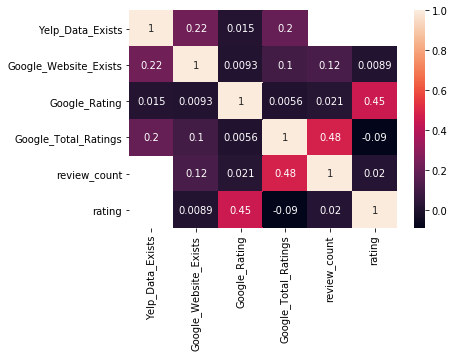

In [7]:
corrMatrix = finished_business_data[['Yelp_Data_Exists', 'Google_Website_Exists', 
                            'Google_Rating', 'Google_Total_Ratings', 'review_count', 'rating']].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

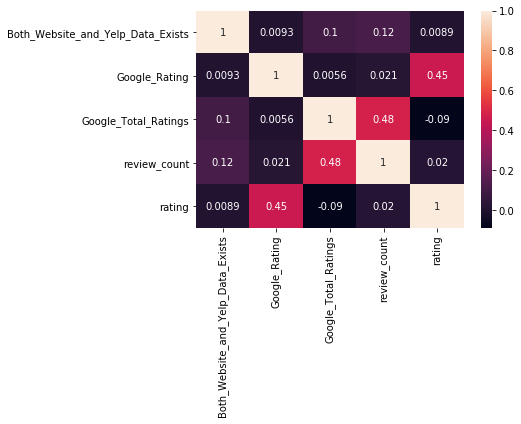

In [8]:
corrMatrix2 = finished_business_data[['Both_Website_and_Yelp_Data_Exists', 'Google_Rating',
                            'Google_Total_Ratings', 'review_count', 'rating']].corr()
sn.heatmap(corrMatrix2, annot=True)
plt.show()

### Boxplots

<p>To make visualizing the differences of business ratings between mediums of technical platforms easier, we plot <strong>boxplots</strong> of the ditributions.</p>

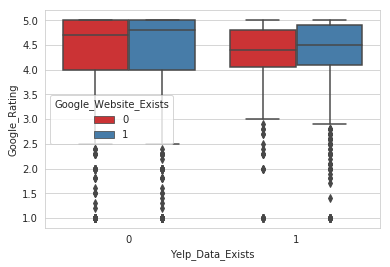

In [9]:
sn.set_style("whitegrid") 
sn.boxplot(x = 'Yelp_Data_Exists', y = 'Google_Rating', hue='Google_Website_Exists', data = finished_business_data, palette="Set1") 

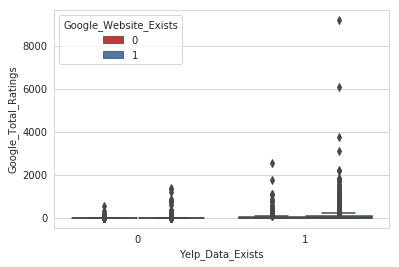

In [10]:
sn.set_style("whitegrid") 
sn.boxplot(x = 'Yelp_Data_Exists', y = 'Google_Total_Ratings', hue='Google_Website_Exists', data = finished_business_data, palette="Set1") 